# What software stack satisfies developers the most over the years.

## The goal of this part is to see the job satisfaction of developer using a particular Language, Database and Platform. We also would like to see a trend of programming languages vs satisfaction over the years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## loading data

In [2]:

data_2017 = pd.read_csv('./../Data/developer_survey_2017/survey_results_public.csv')
data_2017_schema = pd.read_csv('./../Data/developer_survey_2017/survey_results_schema.csv')

data_2018 = pd.read_csv('./../Data/developer_survey_2018/survey_results_public.csv')
data_2018_schema = pd.read_csv('./../Data/developer_survey_2018/survey_results_schema.csv')


data_2019 = pd.read_csv('./../Data/developer_survey_2019/survey_results_public.csv')
data_2019_schema = pd.read_csv('./../Data/developer_survey_2019/survey_results_schema.csv')

data_2020 = pd.read_csv('./../Data/developer_survey_2020/survey_results_public.csv')
data_2020_schema = pd.read_csv('./../Data/developer_survey_2020/survey_results_schema.csv')





/Users/muhammadnaumanzahoor/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
list(data_2018_schema[data_2018_schema.Column == 'JobSatisfaction' ].QuestionText)

['How satisfied are you with your current job? If you work more than one job, please answer regarding the one you spend the most hours on.']

## Lets look at our relevent columns


## 2017

In [4]:
# 2017
# lets see the contents of JobSatisfaction columns in data
data_2017.JobSatisfaction.unique()

array([nan,  9.,  3.,  8.,  6.,  7.,  5.,  4., 10.,  2.,  0.,  1.])

## 2018

In [5]:
# lets see the contents of JobSatisfaction columns in data 
data_2018.JobSatisfaction.unique()


array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

## 2019

In [6]:
# lets see the contents of JobSat columns in data 
data_2019.JobSat.unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

## 2020

In [7]:
#JobSat
# lets see the contents of JobSat columns in data 
data_2020.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)



## we clearly need to create a mapping among the data from different years so that they are in a same range and can be compared. 


###  lets map the job satisfaction of all the years from a number between -5- to 5. 
### For 2017, lets map it as
                                 Actual Mapped
                                    10 = 5
                                     9 = 4
                                     8 = 3
                                     7 = 2
                                     6 = 1
                                     5 = 0
                                     4 = -1
                                     3 = -2
                                     2 = -3
                                     1 = -4
                                     0 = -5

### For 2018, we have 7 unique values. Lets map it as follows:
                           Actual        Mapped
                    Extremely satisfied = 5
                   Moderately satisfied = 4
                     Slightly satisfied = 2.5
     Neither satisfied nor dissatisfied = 0
                  Slightly dissatisfied = -2.5
                Moderately dissatisfied = -4
                 Extremely dissatisfied = -5

### For 2019, lets map it as
                            Actual      Mapped
                        Very satisfied = 5
                    Slightly satisfied = 3.5
    Neither satisfied nor dissatisfied = 0
                 Slightly dissatisfied = -3.5
                     Very dissatisfied = -5
                     
### For 2020, lets map it as 
                              Actual    Mapped
                        Very satisfied = 5
                    Slightly satisfied = 3.5
    Neither satisfied nor dissatisfied = 0
                  lightly dissatisfied = -3.5
                     Very dissatisfied = -5    
                     
                     
###  By applying this mapping, all our values will have the same numeric range or -5 to 5 for all the years.


## lets Keep our relevent columns and then apply this mapping

## 2017

In [8]:
#2017
# lets keep JobSatisfaction,HaveWorkedDatabase,HaveWorkedLanguage,HaveWorkedPlatform
data_2017_s = data_2017.loc[:,['Salary','JobSatisfaction','HaveWorkedLanguage','HaveWorkedDatabase','HaveWorkedPlatform']]
# keep only those rows that contain a JobSatisfaction
data_2017_s = data_2017_s.dropna(subset=['JobSatisfaction']).reset_index(drop=True)

# keep only those rows that contain salary
data_2017_s = data_2017_s.dropna(subset=['Salary']).reset_index(drop=True)


data_2017_s.columns = ['Salary','JobSatisfaction','Languages','Databases','Platforms']

#lets keep those rows whose salary is greater than 10k
data_2017_s = data_2017_s[data_2017_s.Salary>10000].reset_index(drop=True)




data_2017_s.head()

# lets apply maping
mapping_2017 = {
   10: 5,
    9: 4,
    8: 3,
    7: 2,
    6: 1,
    5: 0,
    4: -1,
    3: -2,
    2: -3,
    1: -4,
    0: -5
}
for i in range(len(data_2017_s)):
    data_2017_s.loc[i,'Job_Satisfaction'] = mapping_2017[ data_2017_s.loc[i,'JobSatisfaction'] ]
    
# lets drop people with 0 rating in Job_Satisfaction
data_2017_s = data_2017_s[data_2017_s.Job_Satisfaction!=0].reset_index(drop=True)
data_2017_s


,Salary,JobSatisfaction,Languages,Databases,Platforms,Job_Satisfaction
0,113750.000000,9.0,Java; PHP; Python,MySQL,NaN,4.0
1,100000.000000,8.0,Assembly; C; C++,NaN,Mac OS,3.0
2,130000.000000,8.0,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,MySQL; PostgreSQL; Oracle,Linux Desktop; Amazon Web Services (AWS),3.0
3,82500.000000,3.0,NaN,NaN,NaN,-2.0
4,100764.000000,9.0,Java,Cassandra; MySQL,NaN,4.0
...,...,...,...,...,...,...
10326,59808.612440,7.0,Java; JavaScript; SQL,MySQL,Serverless,2.0
10327,74193.548387,7.0,Go; JavaScript; Python,Redis; MySQL,Amazon Web Services (AWS),2.0
10328,107526.881720,10.0,JavaScript; Objective-C; Python; Swift,MongoDB,iOS; Linux Desktop; Mac OS; Arduino; Raspberry...,5.0
10329,58000.000000,3.0,C#; JavaScript; Python; SQL; VB.NET; VBA,SQL Server,Windows Desktop,-2.0


# 2018

In [9]:
#2018

# lets keep JobSatisfaction,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith
data_2018_s = data_2018.loc[:,['ConvertedSalary','JobSatisfaction','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith']]
# keep only those rows that contain a JobSatisfaction
data_2018_s = data_2018_s.dropna(subset=['JobSatisfaction']).reset_index(drop=True)
# keep only those rows that contain salary
data_2018_s = data_2018_s.dropna(subset=['ConvertedSalary']).reset_index(drop=True)




data_2018_s.columns = ['Salary','JobSatisfaction','Languages','Databases','Platforms']
#lets keep those rows whose salary is greater than 10k
data_2018_s = data_2018_s[data_2018_s.Salary>10000].reset_index(drop=True)
data_2018_s.head()

# lets apply maping
mapping_2018 = {
                'Extremely satisfied' : 5,
               'Moderately satisfied' : 4,
                 'Slightly satisfied' : 2.5,
 'Neither satisfied nor dissatisfied' : 0,
              'Slightly dissatisfied' : -2.5,
            'Moderately dissatisfied' : -4,
             'Extremely dissatisfied' : -5,
    
}
for i in range(len(data_2018_s)):
    data_2018_s.loc[i,'Job_Satisfaction'] = mapping_2018[ data_2018_s.loc[i,'JobSatisfaction'] ]
# lets drop people with 0 rating in Job_Satisfaction
data_2018_s = data_2018_s[data_2018_s.Job_Satisfaction!=0].reset_index(drop=True)
data_2018_s

,Salary,JobSatisfaction,Languages,Databases,Platforms,Job_Satisfaction
0,70841.0,Moderately dissatisfied,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,Linux,-4.0
1,21426.0,Slightly satisfied,C;C++;Java;Matlab;R;SQL;Bash/Shell,SQL Server;PostgreSQL;Oracle;IBM Db2,Arduino;Windows Desktop or Server,2.5
2,41671.0,Moderately satisfied,Java;JavaScript;Python;TypeScript;HTML;CSS,MongoDB,Linux,4.0
3,120000.0,Slightly satisfied,JavaScript;HTML;CSS,MongoDB,Linux,2.5
4,250000.0,Moderately satisfied,Assembly;CoffeeScript;Erlang;Go;JavaScript;Lua...,Redis;PostgreSQL;Amazon DynamoDB;Apache HBase;...,Amazon Echo;AWS;iOS;Linux;Mac OS;Serverless,4.0
...,...,...,...,...,...,...
38272,63979.0,Extremely satisfied,C;C#;JavaScript;R;SQL;VB.NET;HTML;CSS,SQL Server;SQLite,Linux;Windows Desktop or Server,5.0
38273,150000.0,Slightly satisfied,CoffeeScript;JavaScript;PHP;Ruby;SQL;HTML;CSS;...,Redis;SQL Server;MySQL;PostgreSQL;Memcached,AWS;Heroku;Linux,2.5
38274,1000000.0,Slightly dissatisfied,C#;JavaScript;SQL;TypeScript;VBA;VB.NET;Visual...,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Android,-2.5
38275,85000.0,Moderately dissatisfied,C#;JavaScript;SQL;HTML;CSS,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...",AWS;Azure,-4.0


# 2019

In [10]:
#2019
# lets keep JobSat,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith

data_2019_s = data_2019.loc[:,['ConvertedComp','JobSat','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith']]

# keep only those rows that contain a JobSat
data_2019_s = data_2019_s.dropna(subset=['JobSat']).reset_index(drop=True)
# keep only those rows that contain a salary
data_2019_s = data_2019_s.dropna(subset=['ConvertedComp']).reset_index(drop=True)


data_2019_s.columns = ['Salary','JobSatisfaction','Languages','Databases','Platforms']
#lets keep those rows whose salary is greater than 10k
data_2019_s = data_2019_s[data_2019_s.Salary>10000].reset_index(drop=True)
data_2019_s.head()

# lets apply maping
mapping_2019 = {
                   'Very satisfied' : 5,
                'Slightly satisfied' : 3.5,
'Neither satisfied nor dissatisfied' : 0,
             'Slightly dissatisfied' : -3.5,
                 'Very dissatisfied' : -5,
}
for i in range(len(data_2019_s)):
    data_2019_s.loc[i,'Job_Satisfaction'] = mapping_2019[ data_2019_s.loc[i,'JobSatisfaction'] ]
# lets drop people with 0 rating in Job_Satisfaction
data_2019_s = data_2019_s[data_2019_s.Job_Satisfaction!=0].reset_index(drop=True)
data_2019_s





,Salary,JobSatisfaction,Languages,Databases,Platforms,Job_Satisfaction
0,61000.0,Slightly satisfied,C;C++;C#;Python;SQL,MySQL;SQLite,Linux;Windows,3.5
1,366420.0,Slightly satisfied,Java;R;SQL,MongoDB;PostgreSQL,Android;Google Cloud Platform;Linux;Windows,3.5
2,95179.0,Slightly satisfied,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,DynamoDB;PostgreSQL;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,3.5
3,13293.0,Slightly dissatisfied,C#;Go;JavaScript;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Linux;Windows,-3.5
4,90000.0,Very satisfied,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Couchbase;DynamoDB;Firebase;MySQL,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,5.0
...,...,...,...,...,...,...
44742,180000.0,Slightly satisfied,Bash/Shell/PowerShell;C#;HTML/CSS;Java;Python;...,DynamoDB;MySQL,AWS;Linux;MacOS;Windows,3.5
44743,2000000.0,Very satisfied,Bash/Shell/PowerShell;C;Clojure;HTML/CSS;Java;...,Oracle,Docker;iOS;Kubernetes;Linux;Slack;Windows;Othe...,5.0
44744,130000.0,Very satisfied,HTML/CSS;JavaScript;Scala;TypeScript,PostgreSQL,Slack,5.0
44745,588012.0,Very dissatisfied,C#;HTML/CSS;Java;JavaScript;PHP;Python,MariaDB;PostgreSQL,Android;Arduino;Linux;Raspberry Pi;WordPress,-5.0


# 2020

In [11]:
#2020
# lets keep JobSat,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith

data_2020_s = data_2020.loc[:,['ConvertedComp','JobSat','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith']]

# keep only those rows that contain a JobSat
data_2020_s = data_2020_s.dropna(subset=['JobSat']).reset_index(drop=True)
# keep only those rows that contain a salary
data_2020_s = data_2020_s.dropna(subset=['ConvertedComp']).reset_index(drop=True)

data_2020_s.columns = ['Salary','JobSatisfaction','Languages','Databases','Platforms']
#lets keep those rows whose salary is greater than 10k
data_2020_s = data_2020_s[data_2020_s.Salary>10000].reset_index(drop=True)
data_2020_s.head()

# lets apply maping
mapping_2020 = {
                   'Very satisfied' : 5,
                'Slightly satisfied' : 4,
'Neither satisfied nor dissatisfied' : 0,
             'Slightly dissatisfied' : -3.5,
                 'Very dissatisfied' : -5,
}
for i in range(len(data_2020_s)):
    data_2020_s.loc[i,'Job_Satisfaction'] = mapping_2020[ data_2020_s.loc[i,'JobSatisfaction'] ]
# lets drop people with 0 rating in Job_Satisfaction
data_2020_s = data_2020_s[data_2020_s.Job_Satisfaction!=0].reset_index(drop=True)
data_2020_s






,Salary,JobSatisfaction,Languages,Databases,Platforms,Job_Satisfaction
0,116000.0,Slightly dissatisfied,Python;SQL,MariaDB;MySQL;Redis,Docker,-3.5
1,32315.0,Very satisfied,HTML/CSS;Java;JavaScript;Python;SQL,Microsoft SQL Server,Android;Linux;Raspberry Pi;Windows,5.0
2,40070.0,Slightly dissatisfied,C#;JavaScript;Swift,Firebase;MongoDB;PostgreSQL;SQLite,AWS;Heroku;iOS,-3.5
3,14268.0,Very dissatisfied,HTML/CSS;JavaScript,NaN,Windows;WordPress,-5.0
4,38916.0,Very satisfied,C;JavaScript;Python,NaN,MacOS;Windows,5.0
...,...,...,...,...,...,...
27579,140000.0,Very satisfied,NaN,NaN,NaN,5.0
27580,150000.0,Slightly satisfied,NaN,NaN,NaN,4.0
27581,38208.0,Very satisfied,NaN,NaN,NaN,5.0
27582,129718.0,Very satisfied,NaN,NaN,NaN,5.0


## Now that we are done with maping, lets move forward.

### Lets Start with Programming languages and try to see what is trend with languages over time
### We see that a person can select multiple languages so for our analysis, lets split all languages and assign each language the same salary the person has entered.

# 2017

In [12]:

#Lets drop all rows where no languages are entered
data_2017_s2 = data_2017_s.dropna(subset=['Languages']).reset_index(drop=True)
data_2017_s2.head()

,Salary,JobSatisfaction,Languages,Databases,Platforms,Job_Satisfaction
0,113750.0,9.0,Java; PHP; Python,MySQL,NaN,4.0
1,100000.0,8.0,Assembly; C; C++,NaN,Mac OS,3.0
2,130000.0,8.0,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,MySQL; PostgreSQL; Oracle,Linux Desktop; Amazon Web Services (AWS),3.0
3,100764.0,9.0,Java,Cassandra; MySQL,NaN,4.0
4,175000.0,7.0,Java; Scala,MySQL,NaN,2.0


<AxesSubplot:title={'center':'Job Satisfaction per programming Language in 2017'}, xlabel='Languages'>

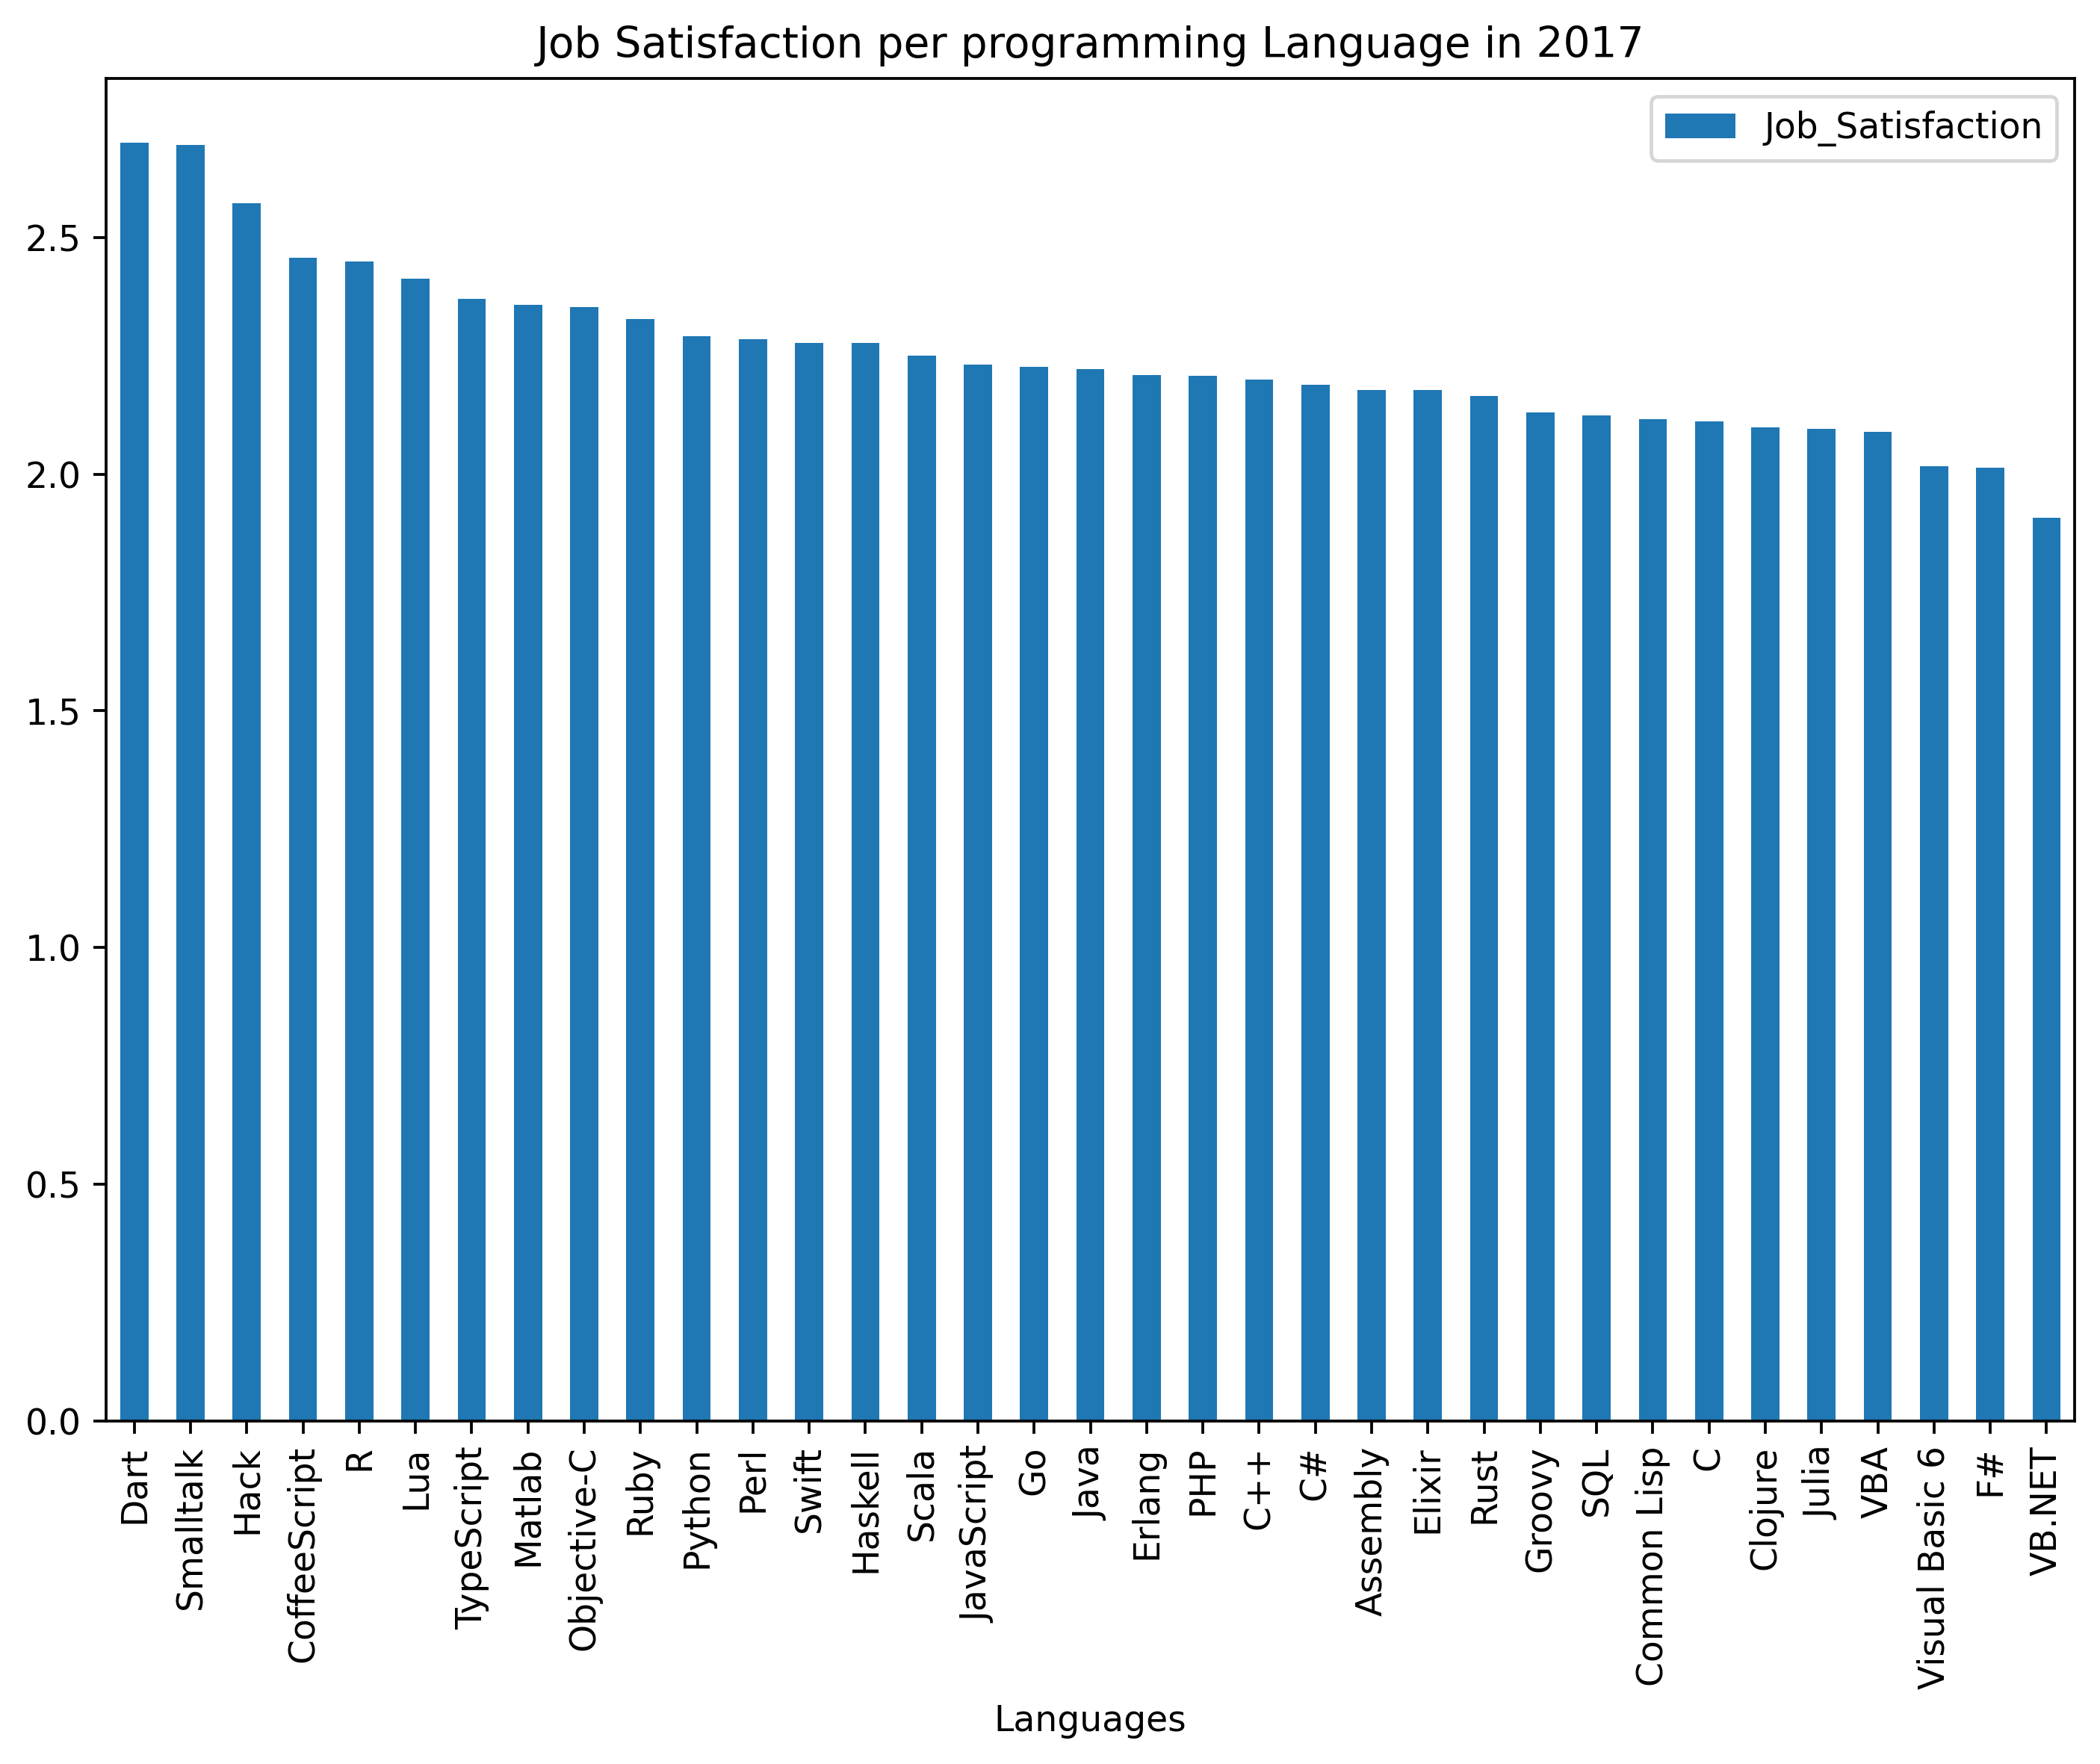

In [13]:
data = data_2017_s2
col = 'Languages'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2017_languages = df_new.groupby('Languages').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2017_languages.plot.bar(title='Job Satisfaction per programming Language in 2017', figsize=(10,7))

## 2018

<AxesSubplot:title={'center':'Job Satisfaction per programming Language in 2018'}, xlabel='Languages'>

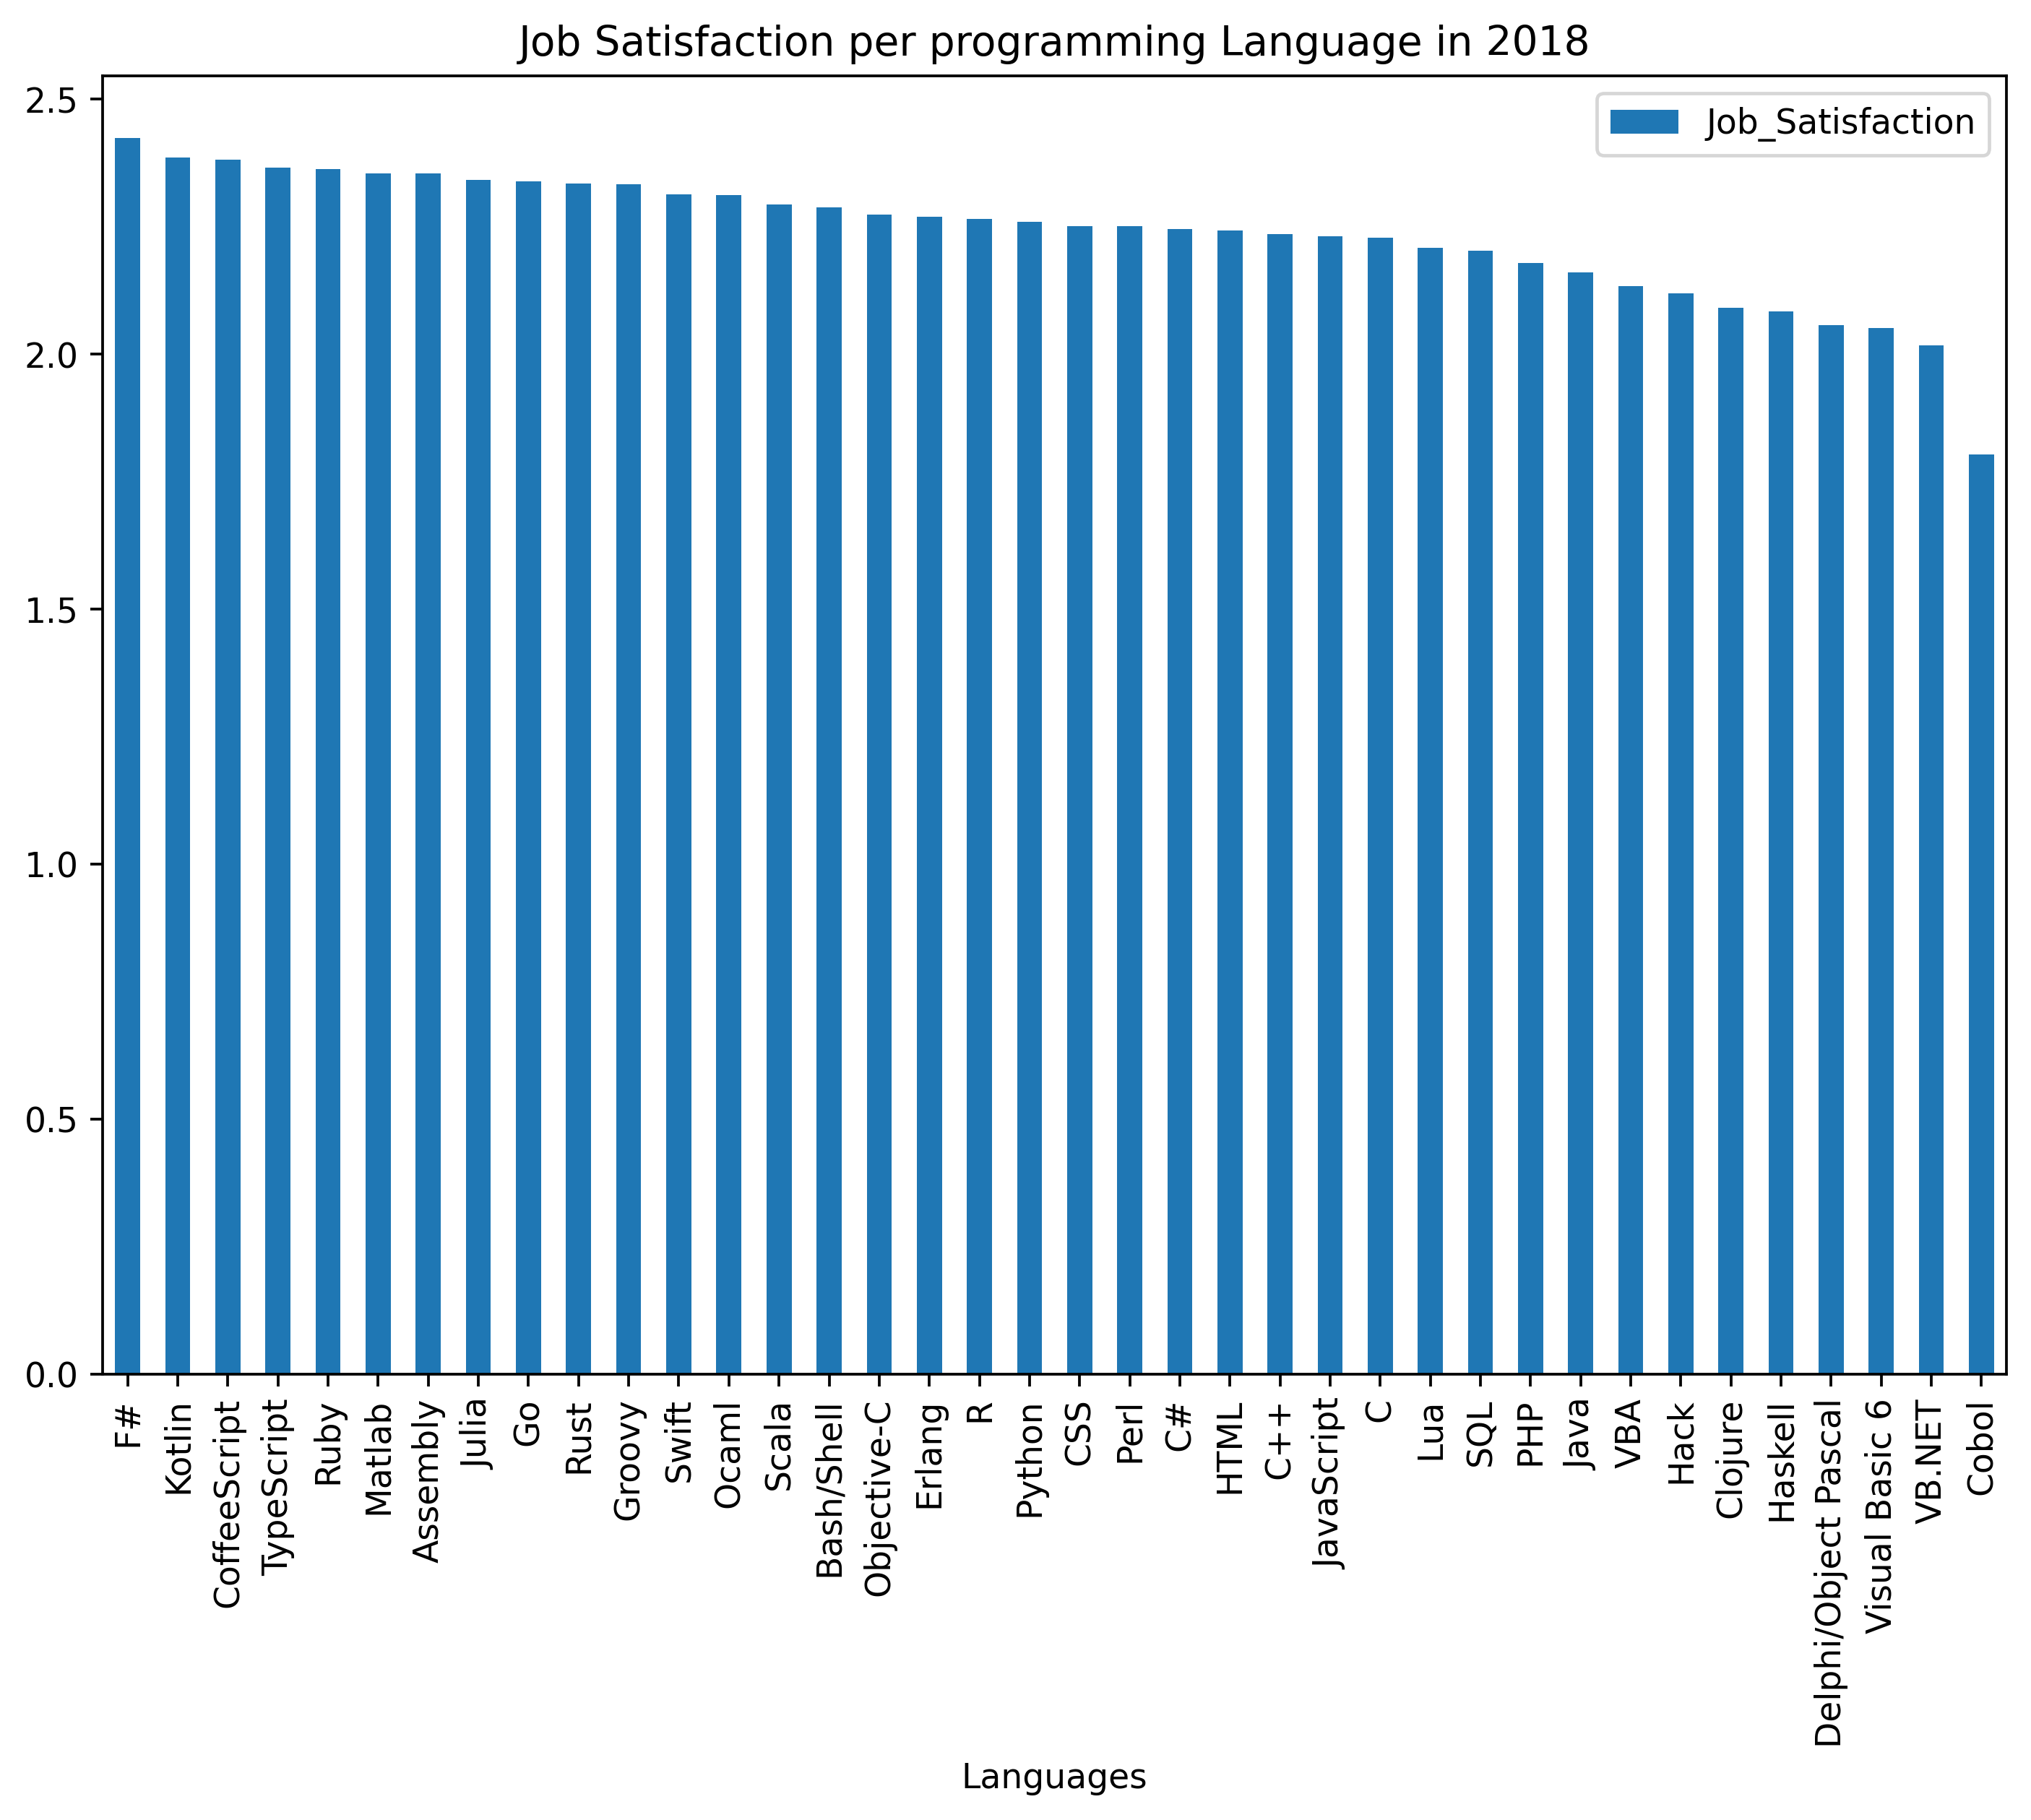

In [14]:

#Lets drop all rows where no languages are entered
data_2018_s2 = data_2018_s.dropna(subset=['Languages']).reset_index(drop=True)
data = data_2018_s2
col = 'Languages'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2018_languages = df_new.groupby('Languages').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2018_languages.plot.bar(title='Job Satisfaction per programming Language in 2018', figsize=(10,7))

# 2019

<AxesSubplot:title={'center':'Job Satisfaction per programming Language in 2019'}, xlabel='Languages'>

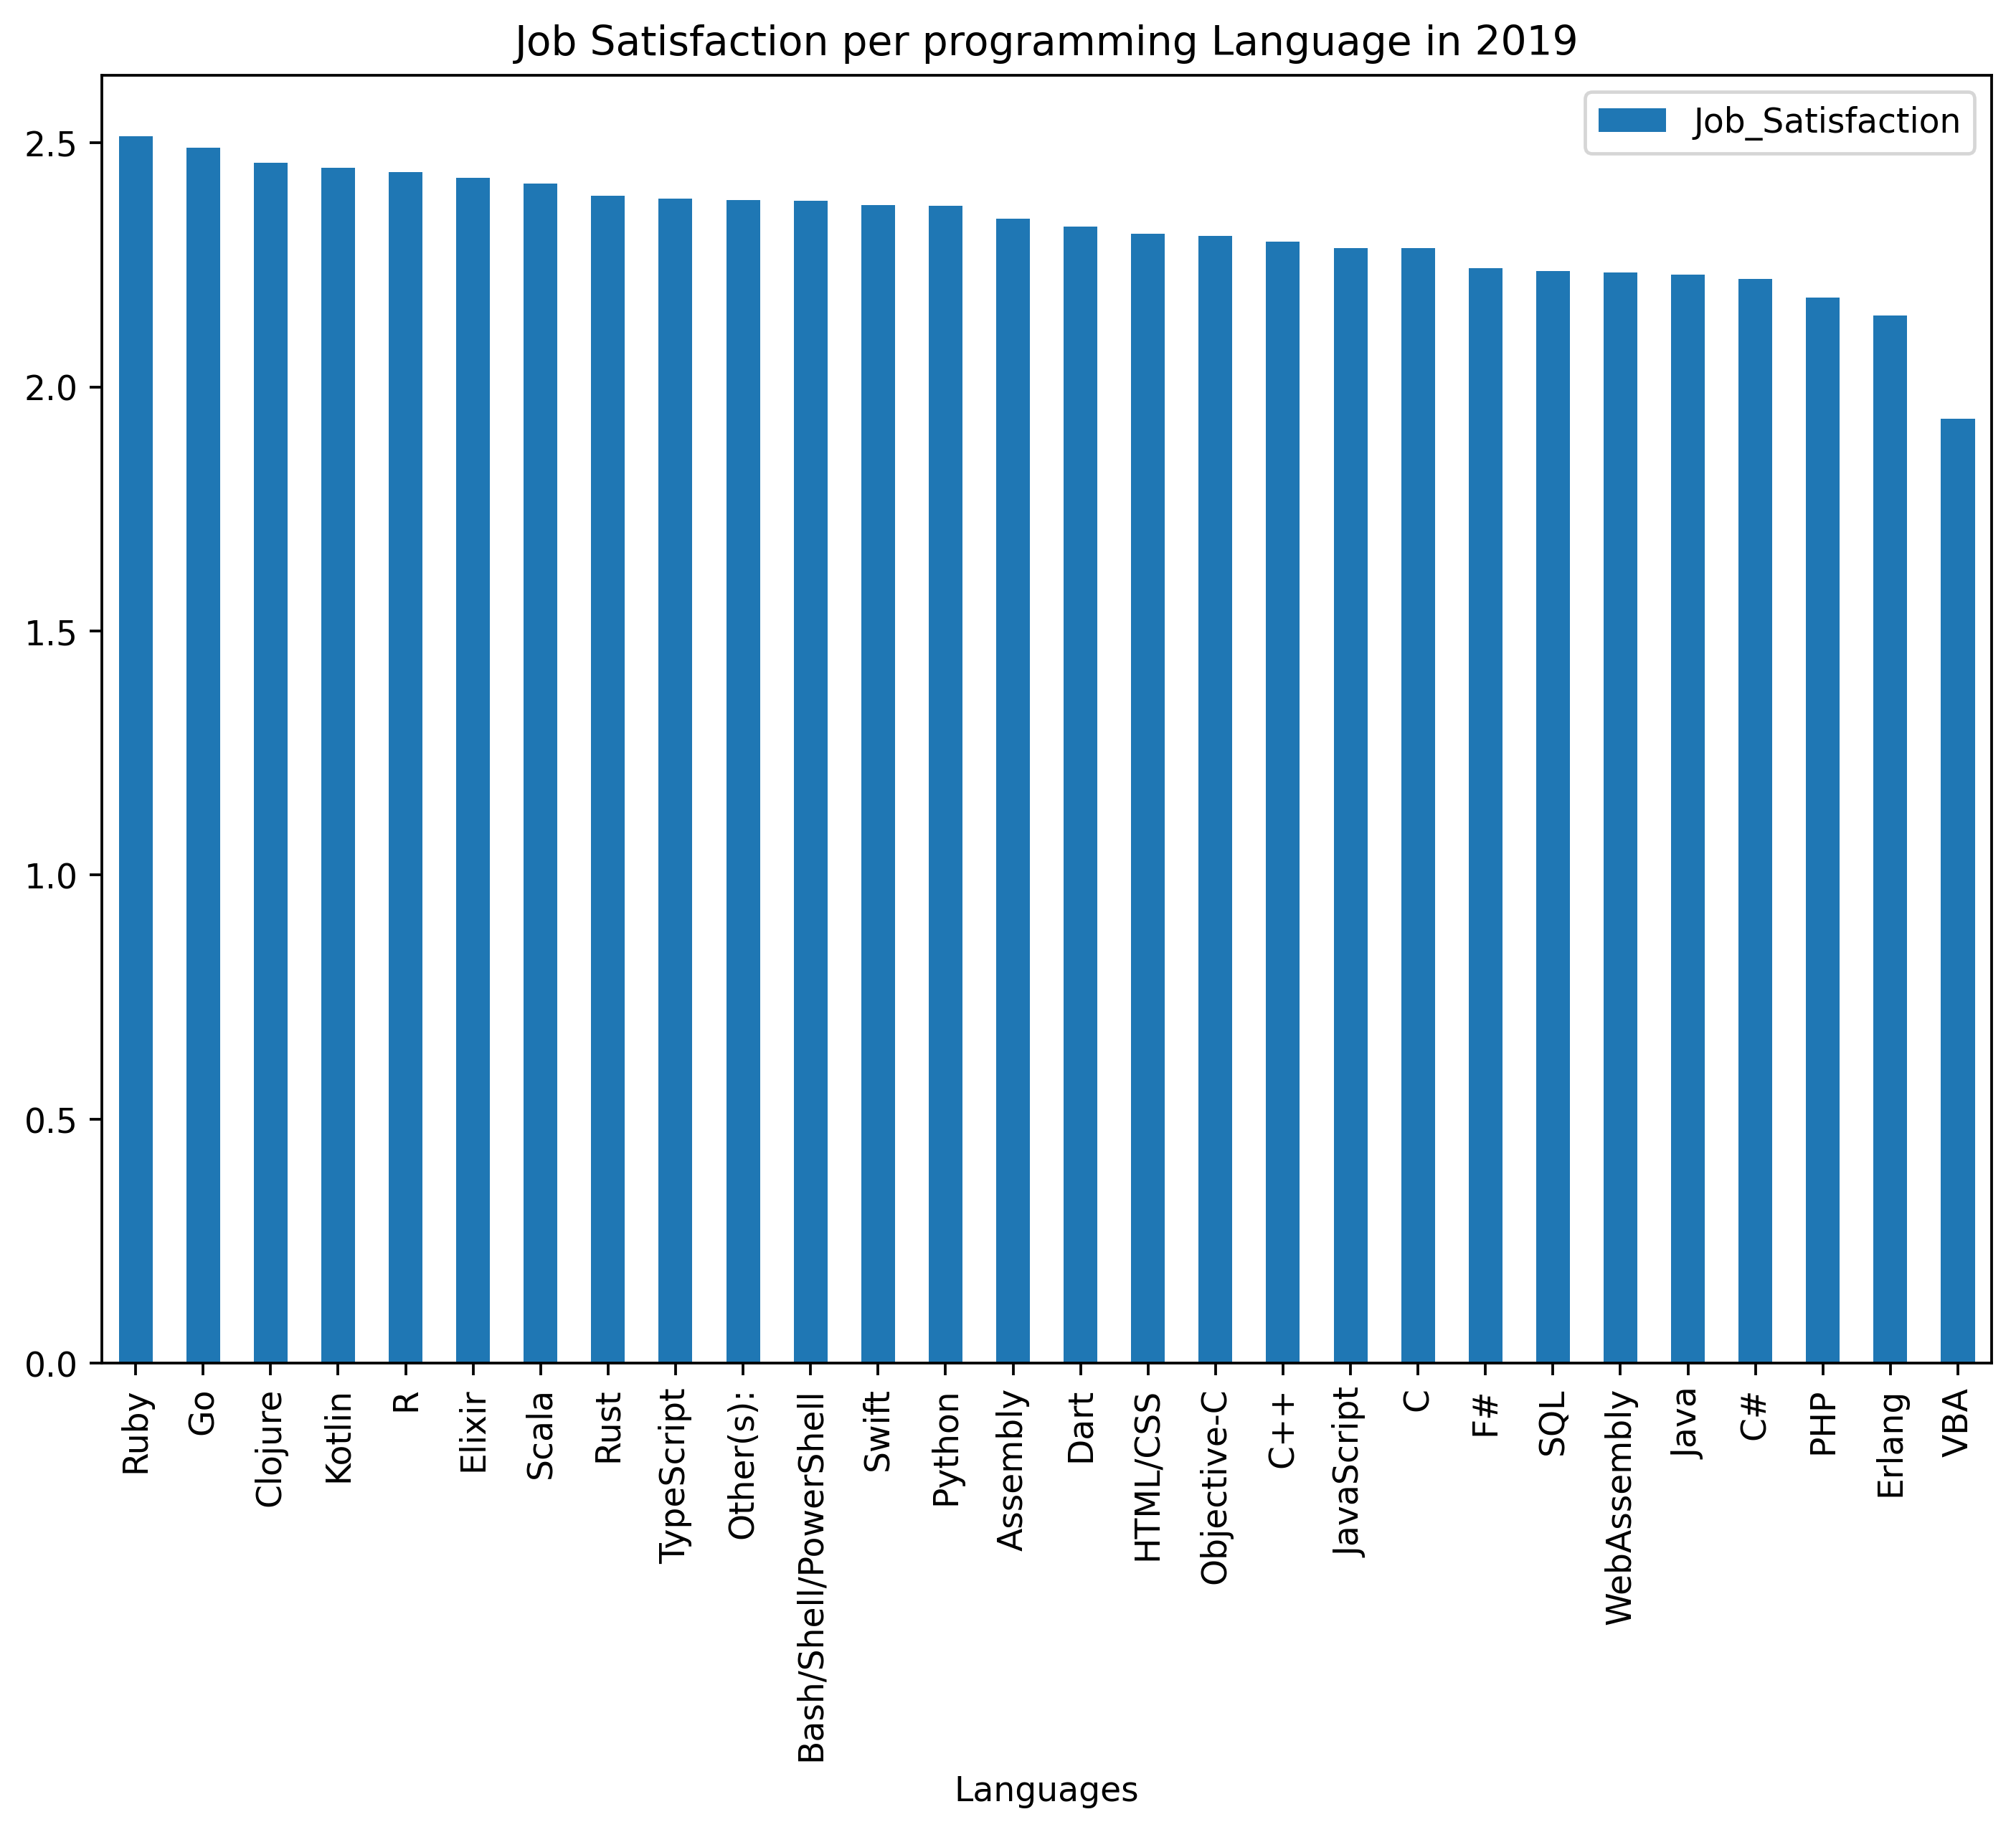

In [15]:

#Lets drop all rows where no languages are entered
data_2019_s2 = data_2019_s.dropna(subset=['Languages']).reset_index(drop=True)
data = data_2019_s2
col = 'Languages'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2019_languages = df_new.groupby('Languages').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2019_languages.plot.bar(title='Job Satisfaction per programming Language in 2019', figsize=(10,7))

# 2020

<AxesSubplot:title={'center':'Job Satisfaction per programming Language in 2020'}, xlabel='Languages'>

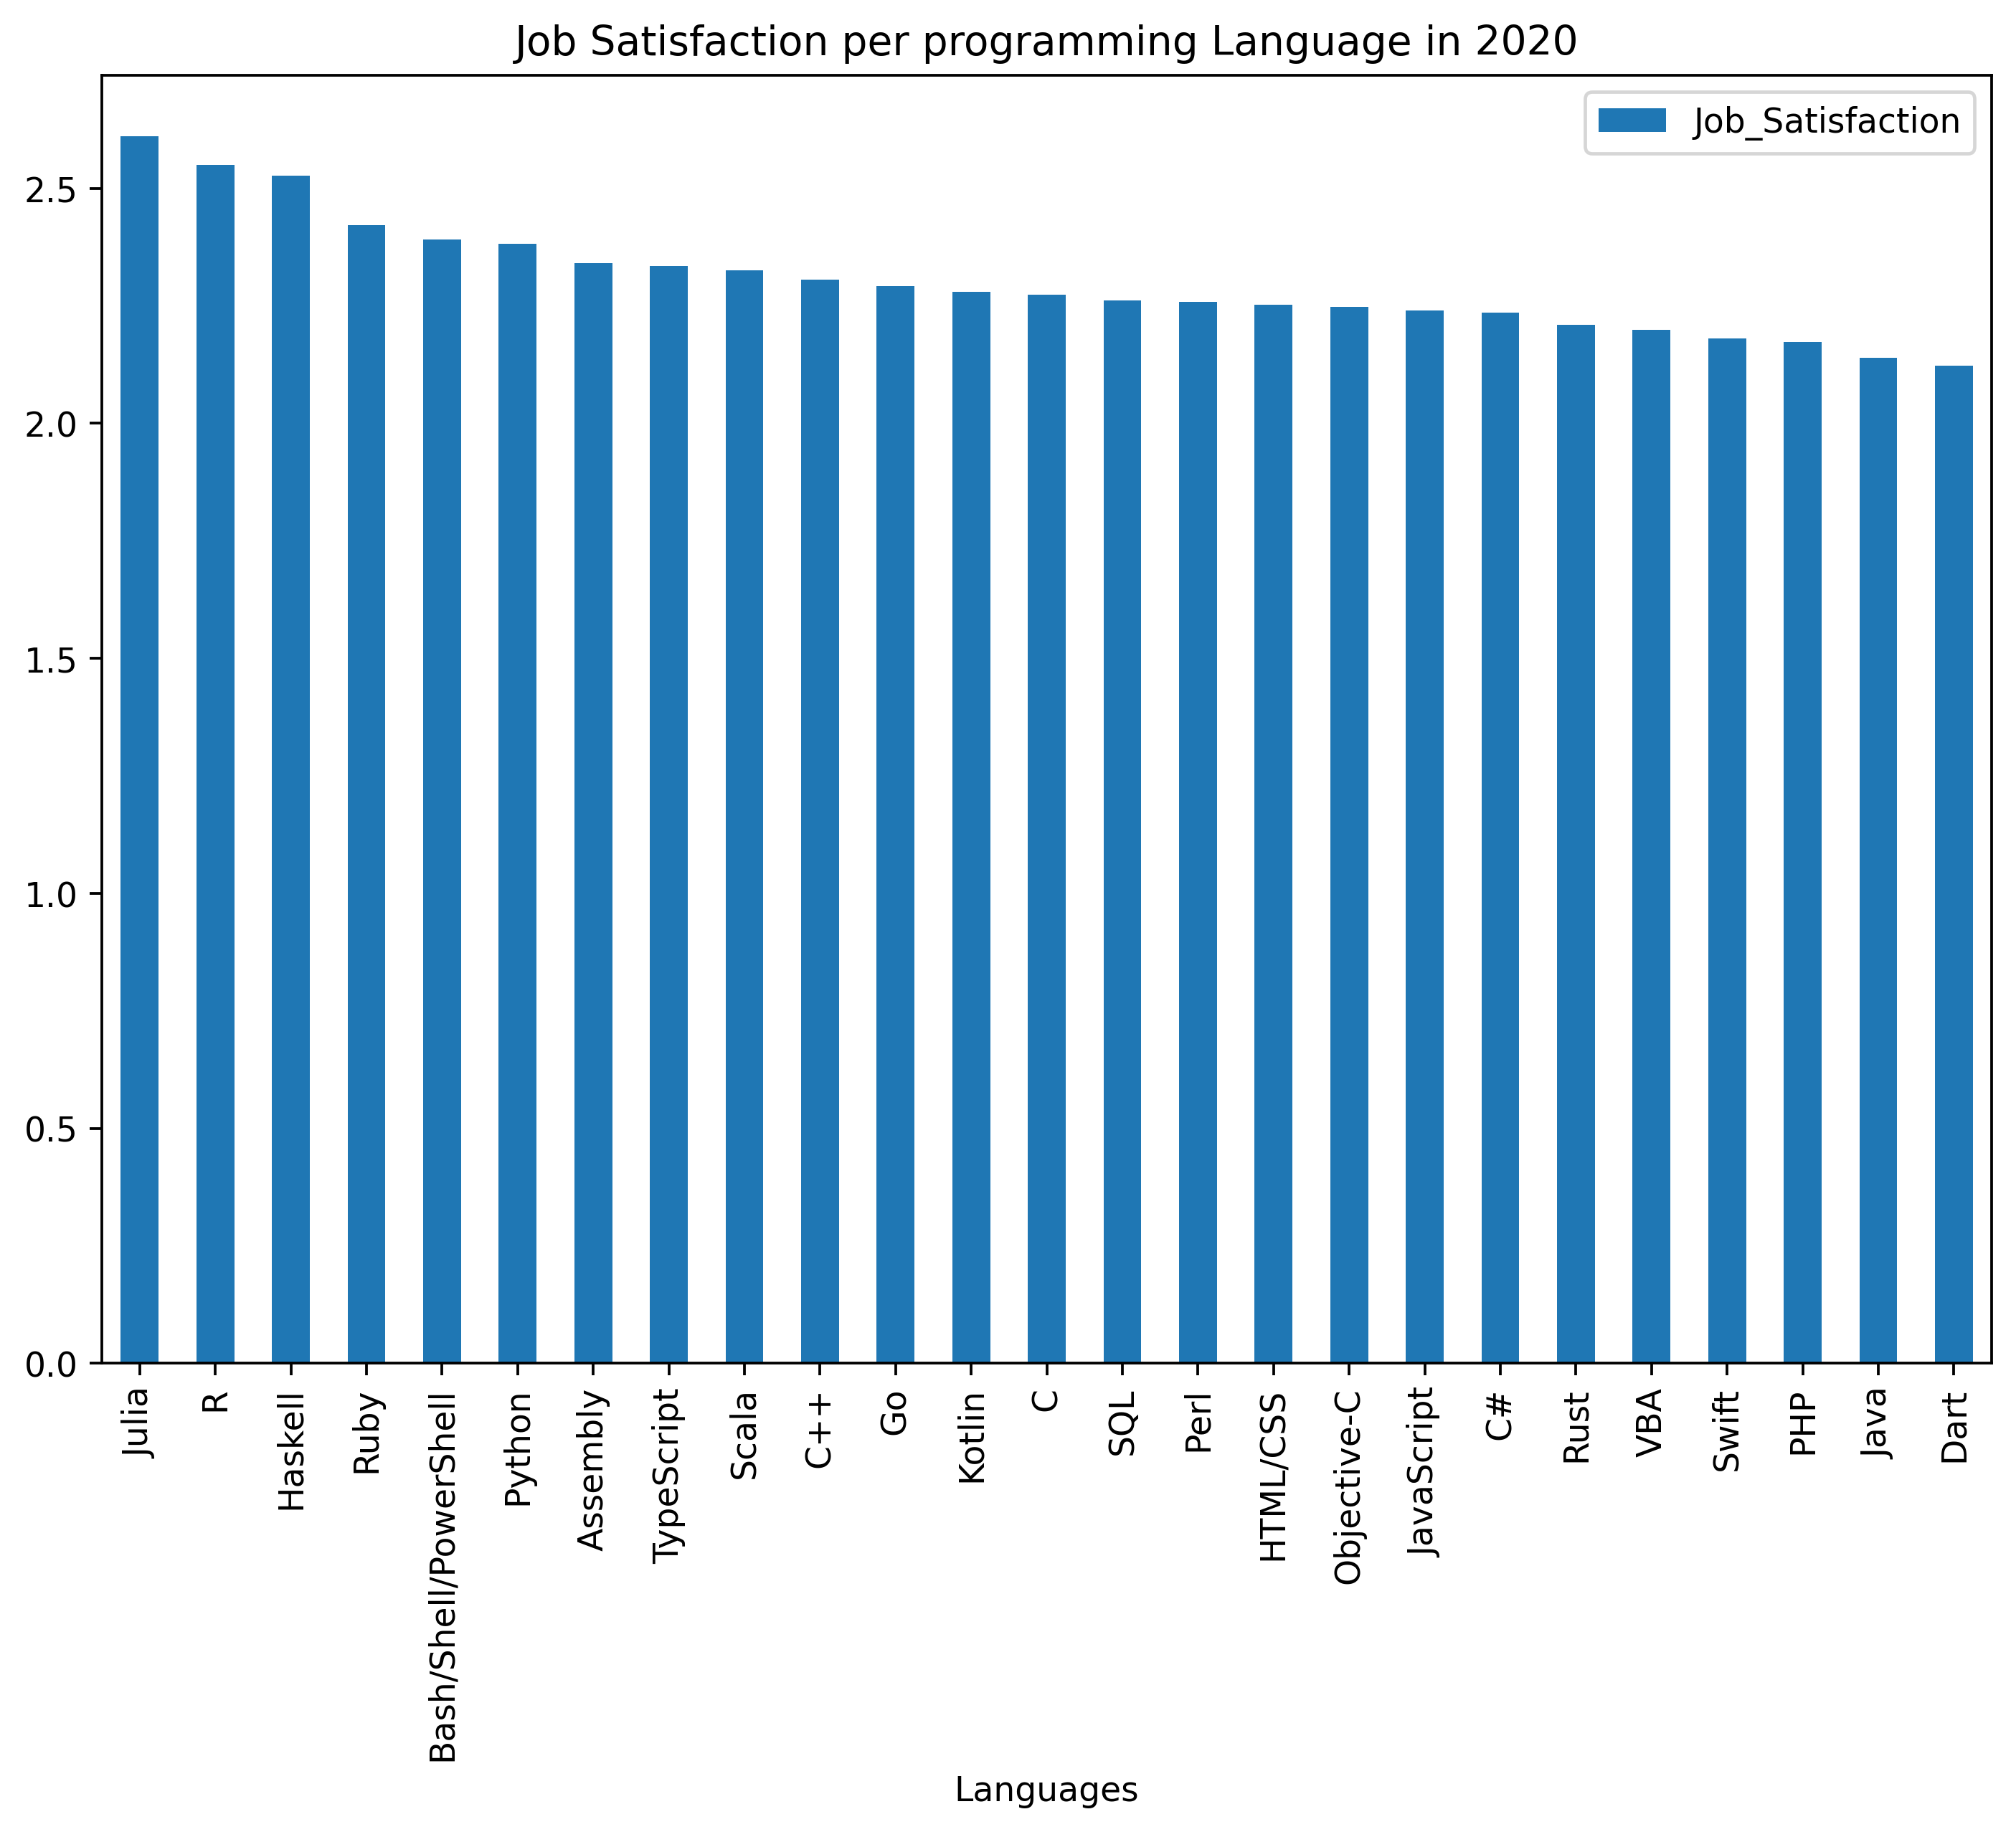

In [16]:

#Lets drop all rows where no languages are entered
data_2020_s2 = data_2020_s.dropna(subset=['Languages']).reset_index(drop=True)
data = data_2020_s2
col = 'Languages'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2020_languages = df_new.groupby('Languages').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2020_languages.plot.bar(title='Job Satisfaction per programming Language in 2020', figsize=(10,7))

## Now lets combine all the dataframes over the years to get a better understanding.

In [17]:


# lets merge all years.
temp = pd.merge(data_2017_languages, data_2018_languages, on='Languages',how = 'right') 
temp = pd.merge(temp, data_2019_languages, on='Languages',how = 'right')
language_trends = pd.merge(temp, data_2020_languages, on='Languages',how = 'outer')
language_trends.columns = ['2017', '2018', '2019','2020']

language_trends

,2017,2018,2019,2020
Languages,,,,
Ruby,2.327324,2.362668,2.513227,2.421111
Go,2.226562,2.339002,2.489389,2.292171
Clojure,2.099174,2.091205,2.459049,NaN
Kotlin,NaN,2.385915,2.448563,2.279896
R,2.449367,2.265873,2.440159,2.549358
Elixir,NaN,NaN,2.428385,NaN
Scala,2.250535,2.293671,2.415802,2.325234
Rust,2.165138,2.334877,2.392102,2.210108
TypeScript,2.369792,2.366159,2.384896,2.334806


In [18]:
# lets keep those rows where there is, at max, 1 years missing
ind = []
for i in range(len(language_trends)):
    if (language_trends.iloc[i,:].isna().sum()) >0 :
        #drop this row
        ind.append(i)
        
language_trends.drop(language_trends.index[ind],inplace=True)
language_trends

,2017,2018,2019,2020
Languages,,,,
Ruby,2.327324,2.362668,2.513227,2.421111
Go,2.226562,2.339002,2.489389,2.292171
R,2.449367,2.265873,2.440159,2.549358
Scala,2.250535,2.293671,2.415802,2.325234
Rust,2.165138,2.334877,2.392102,2.210108
TypeScript,2.369792,2.366159,2.384896,2.334806
Swift,2.277165,2.313565,2.371730,2.180824
Python,2.290763,2.260175,2.370754,2.382030
Assembly,2.177258,2.354593,2.344818,2.340708


<AxesSubplot:title={'center':'Job Satisfaction vs Programming Languages in 2017, 2018 , 2019 and 2020'}, xlabel='Languages'>

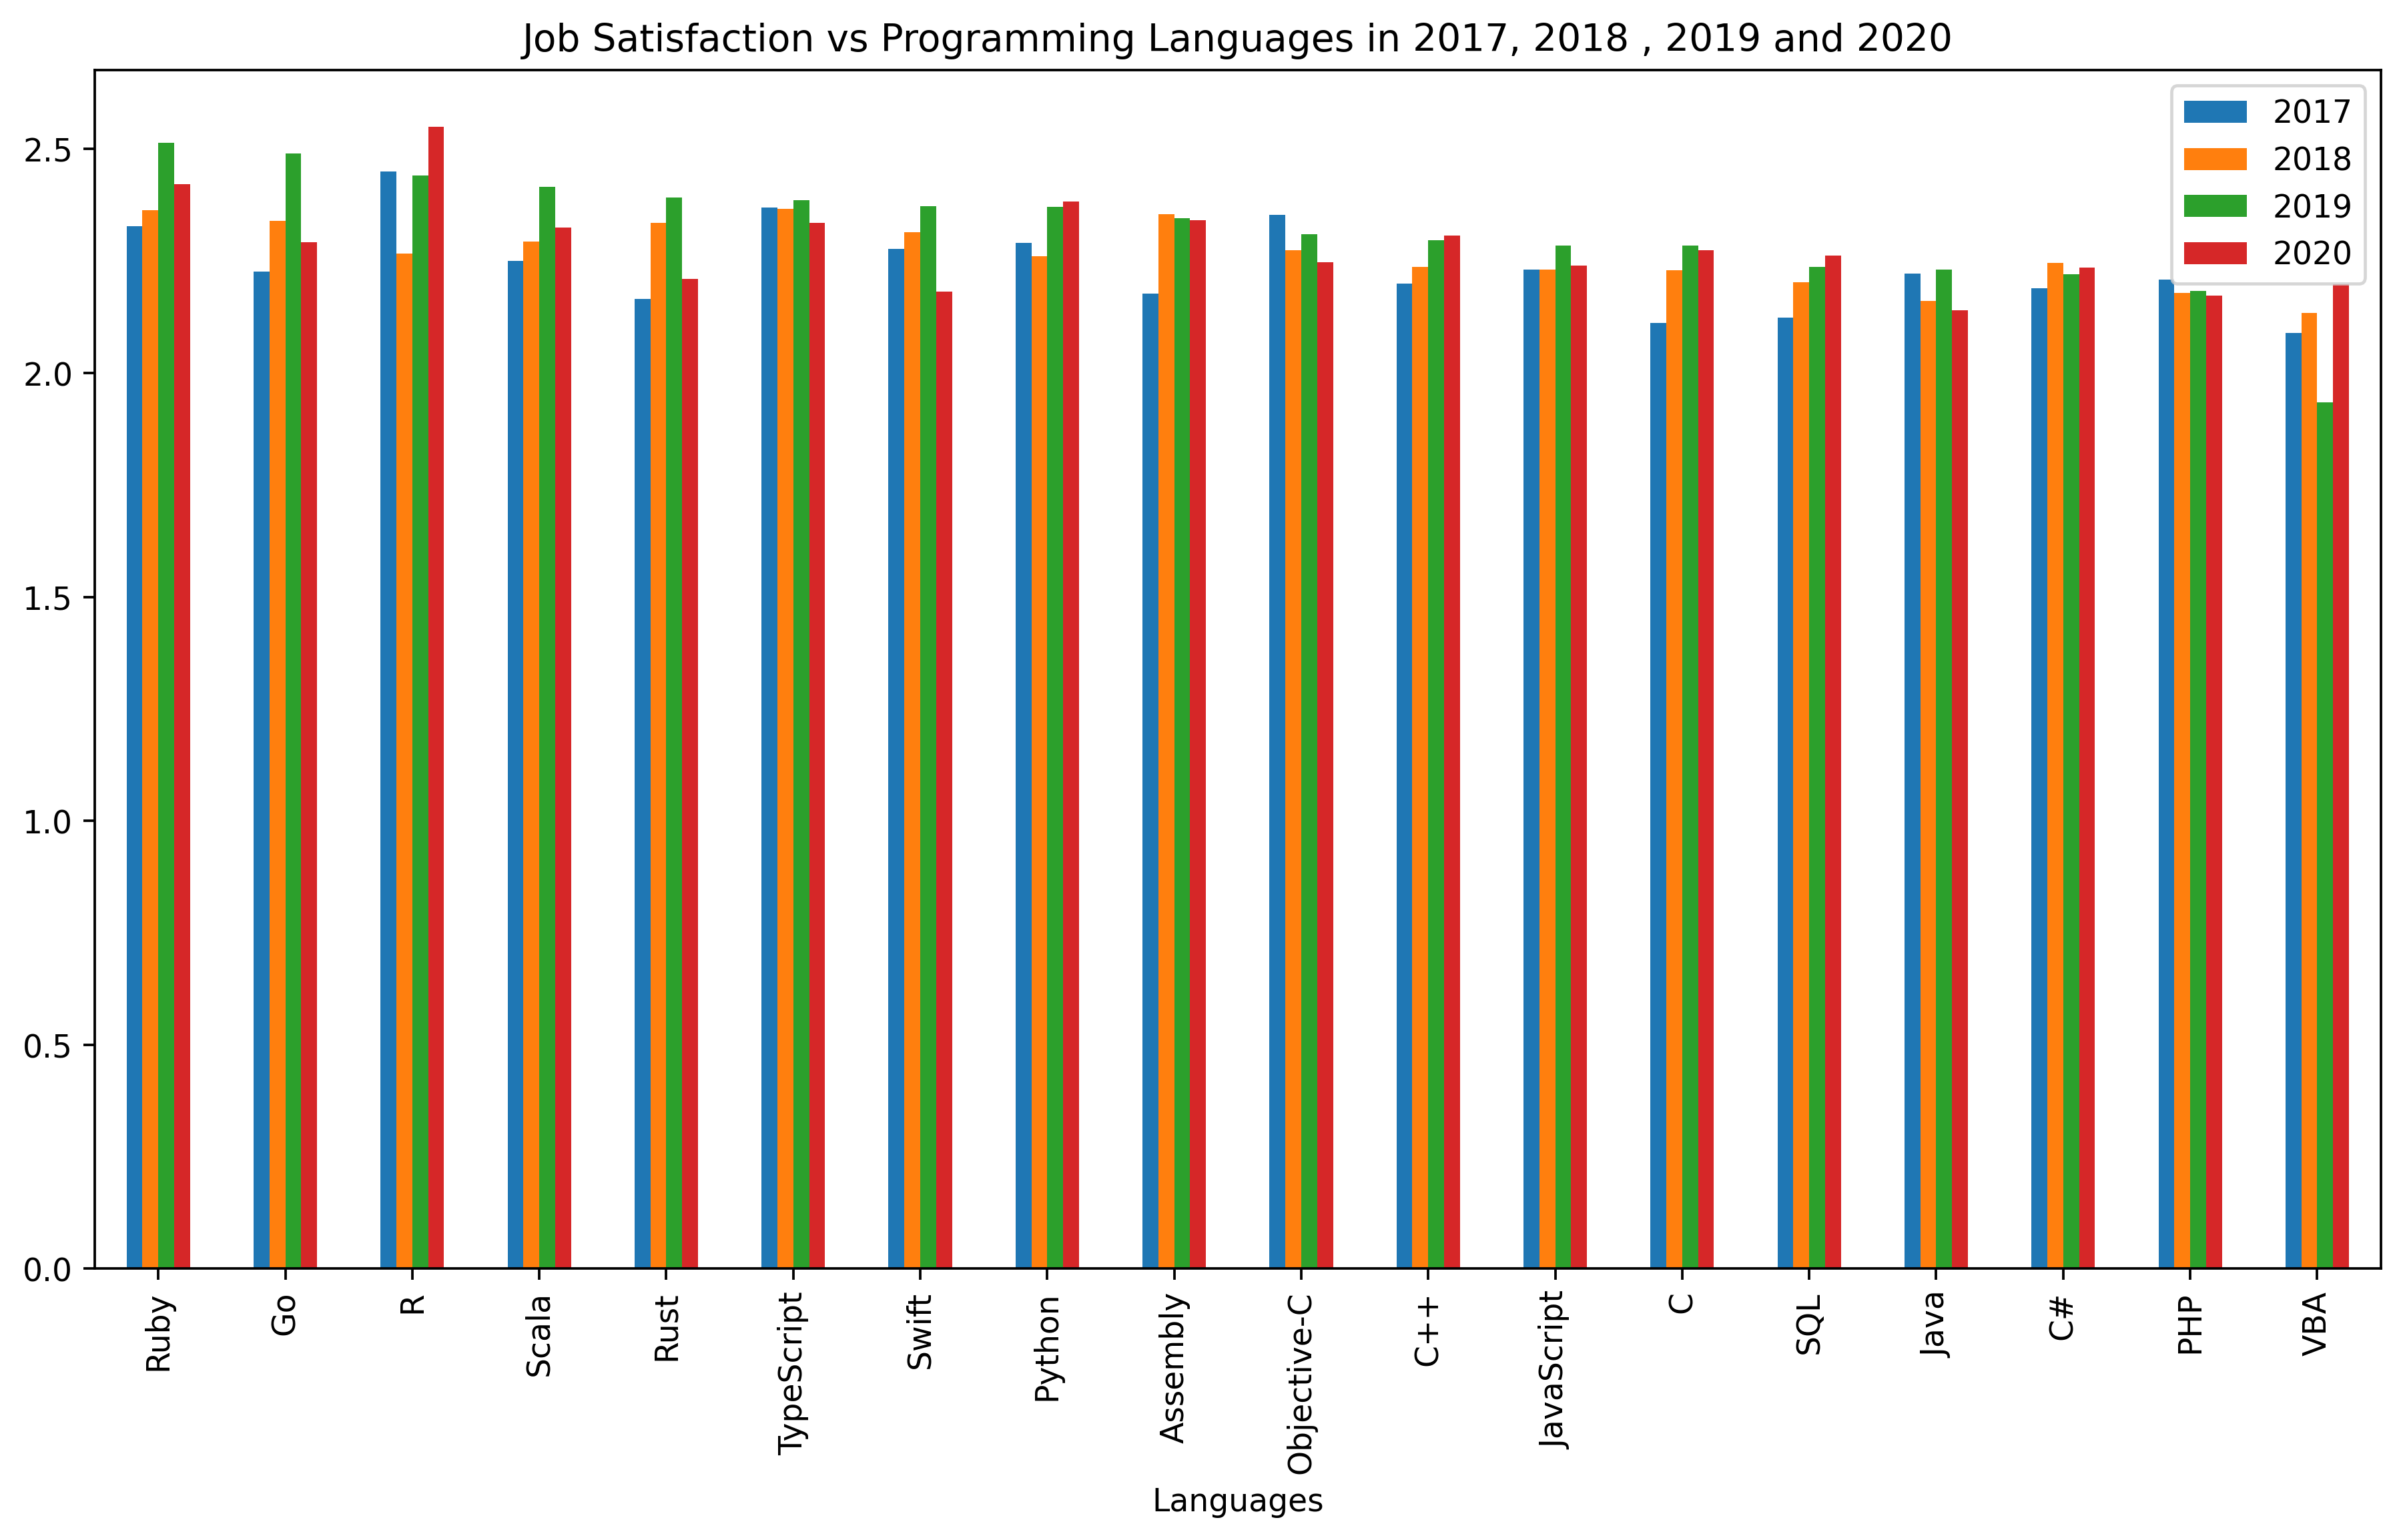

In [19]:

language_trends.plot(title='Job Satisfaction vs Programming Languages in 2017, 2018 , 2019 and 2020',kind='bar', figsize=(13,7))

# Conclusion
## We can see Satisfaction level of Python, C, C++, SQL, developers increase over the years. Satisfaction of PHP developers seems to be dropping consistently every year. 

## Now Lets do the same for Databases

<AxesSubplot:title={'center':'Job Satisfaction per Database in 2017'}, xlabel='Databases'>

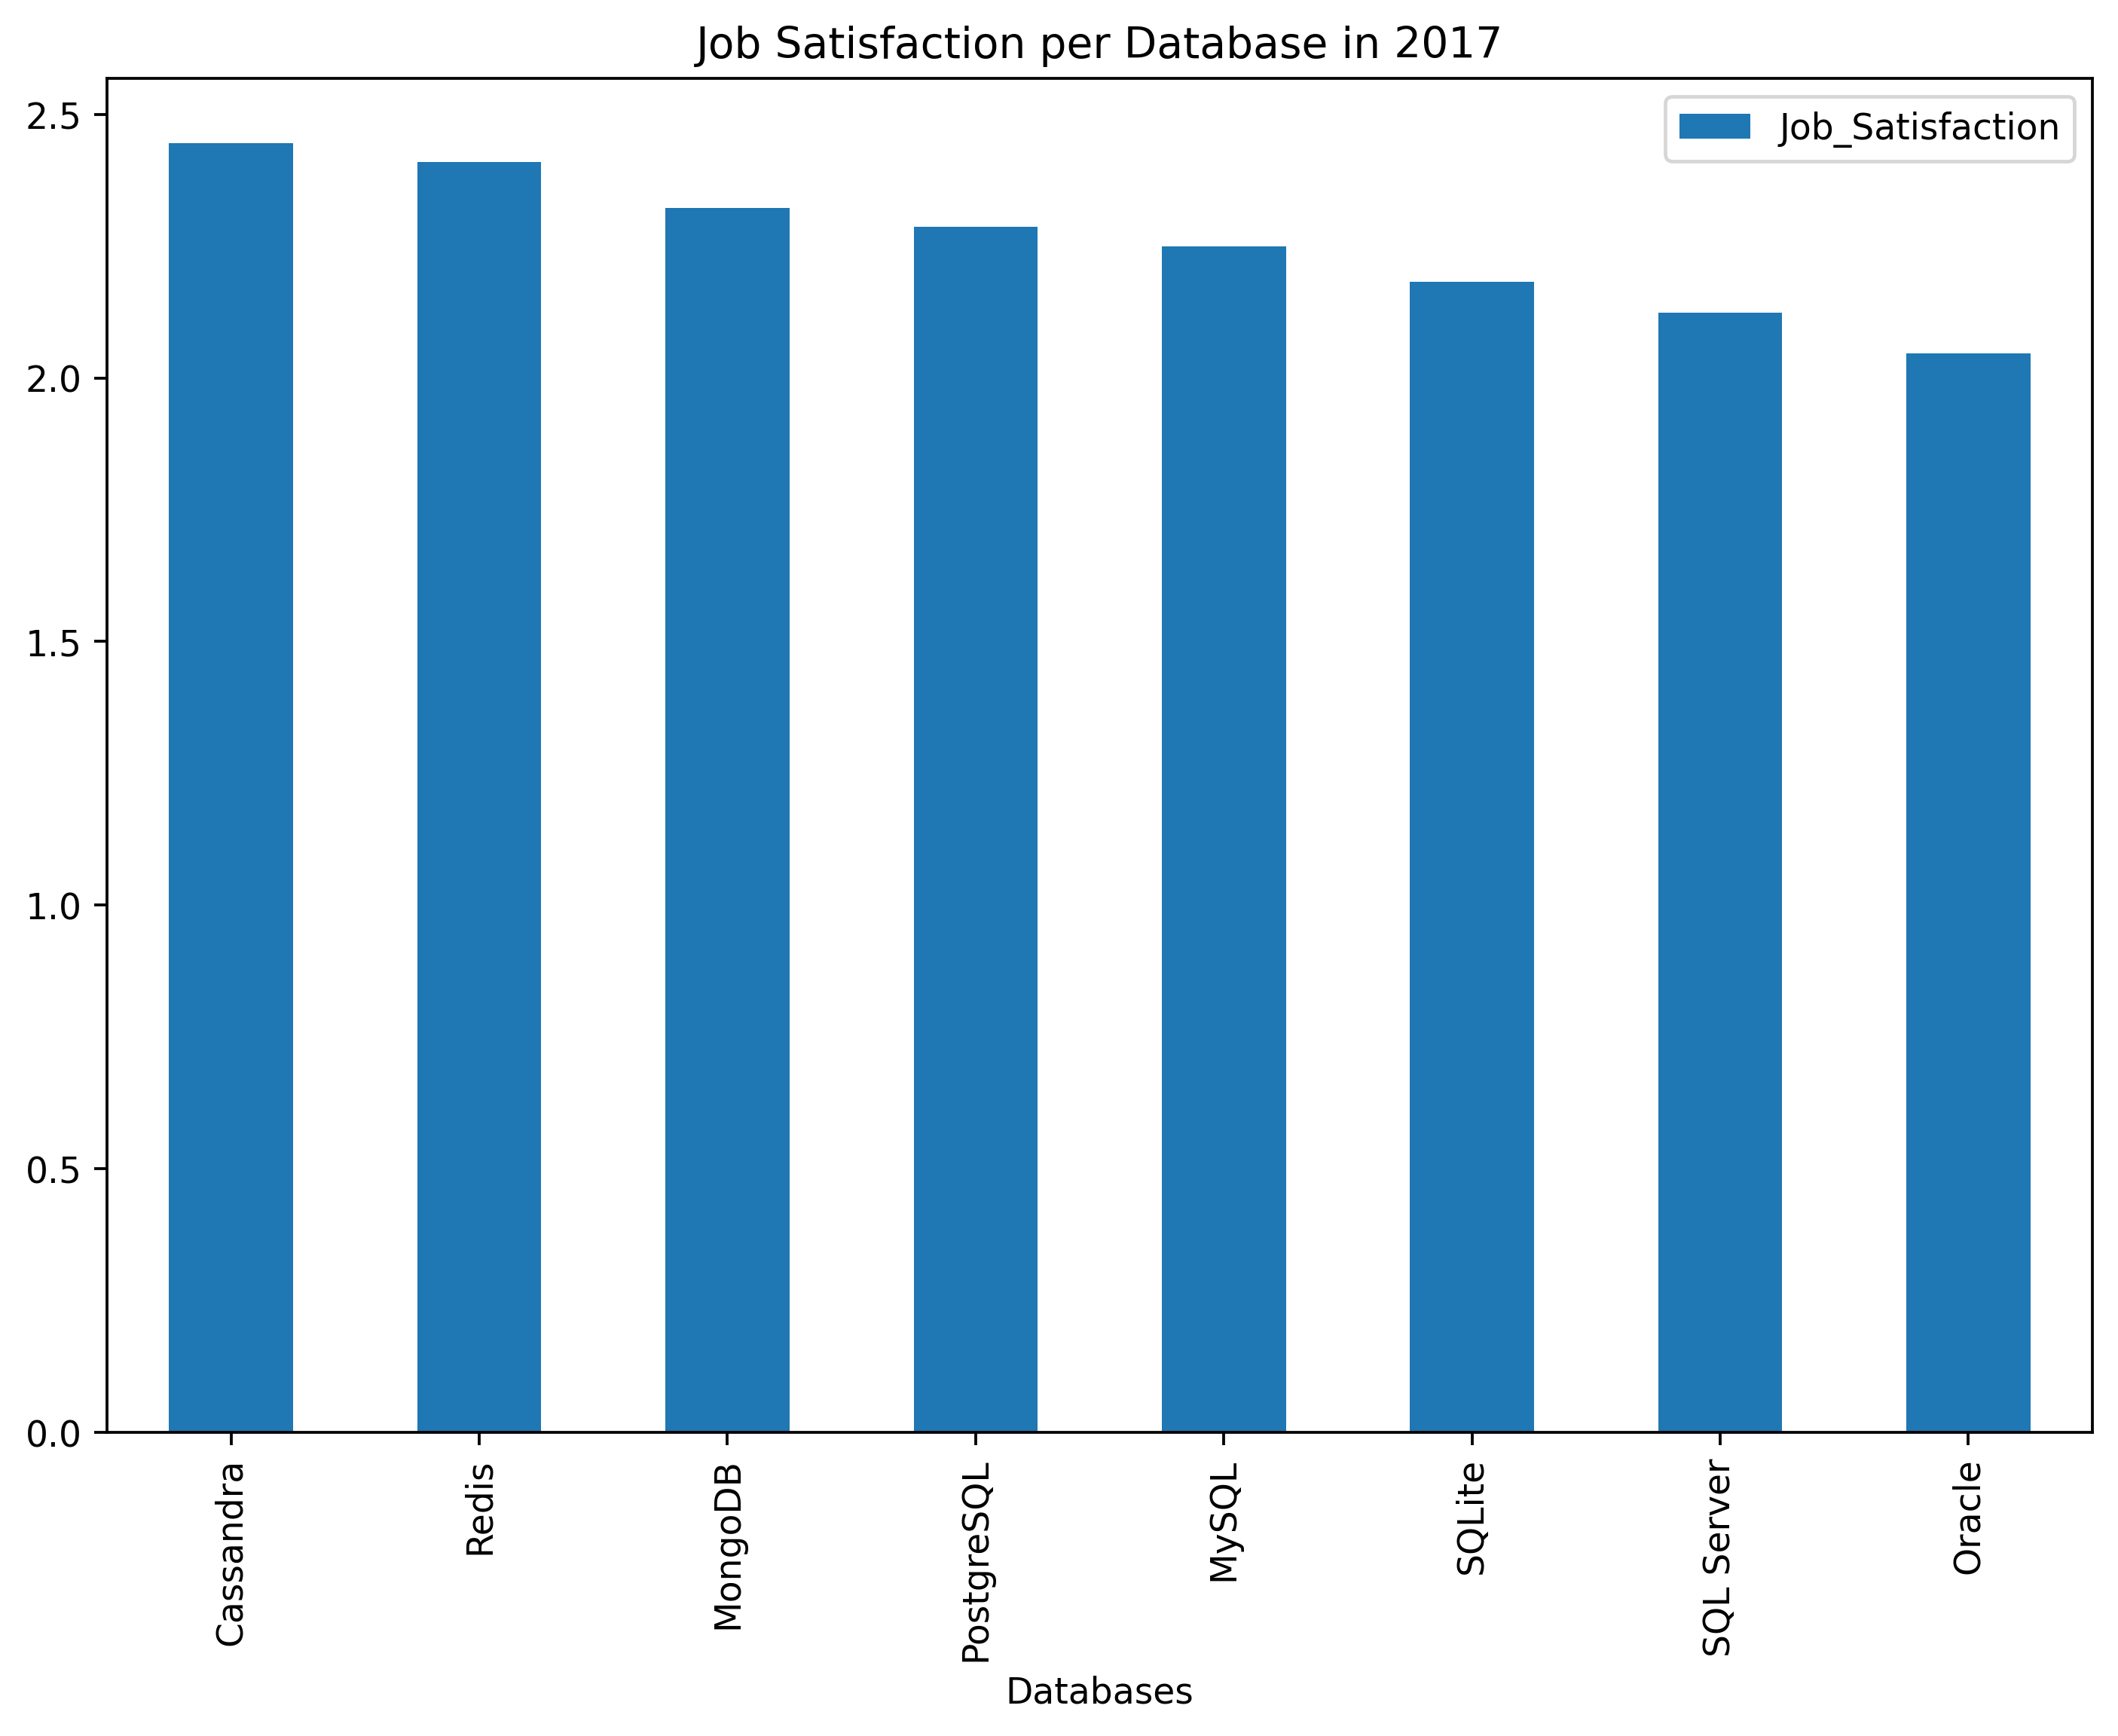

In [20]:
#2017
#Lets drop all rows where no databases are entered
data_2017_s2 = data_2017_s.dropna(subset=['Databases']).reset_index(drop=True)
data = data_2017_s2
col = 'Databases'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2017_databases = df_new.groupby('Databases').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2017_databases.plot.bar(title='Job Satisfaction per Database in 2017', figsize=(10,7))

<AxesSubplot:title={'center':'Job Satisfaction per Database in 2018'}, xlabel='Databases'>

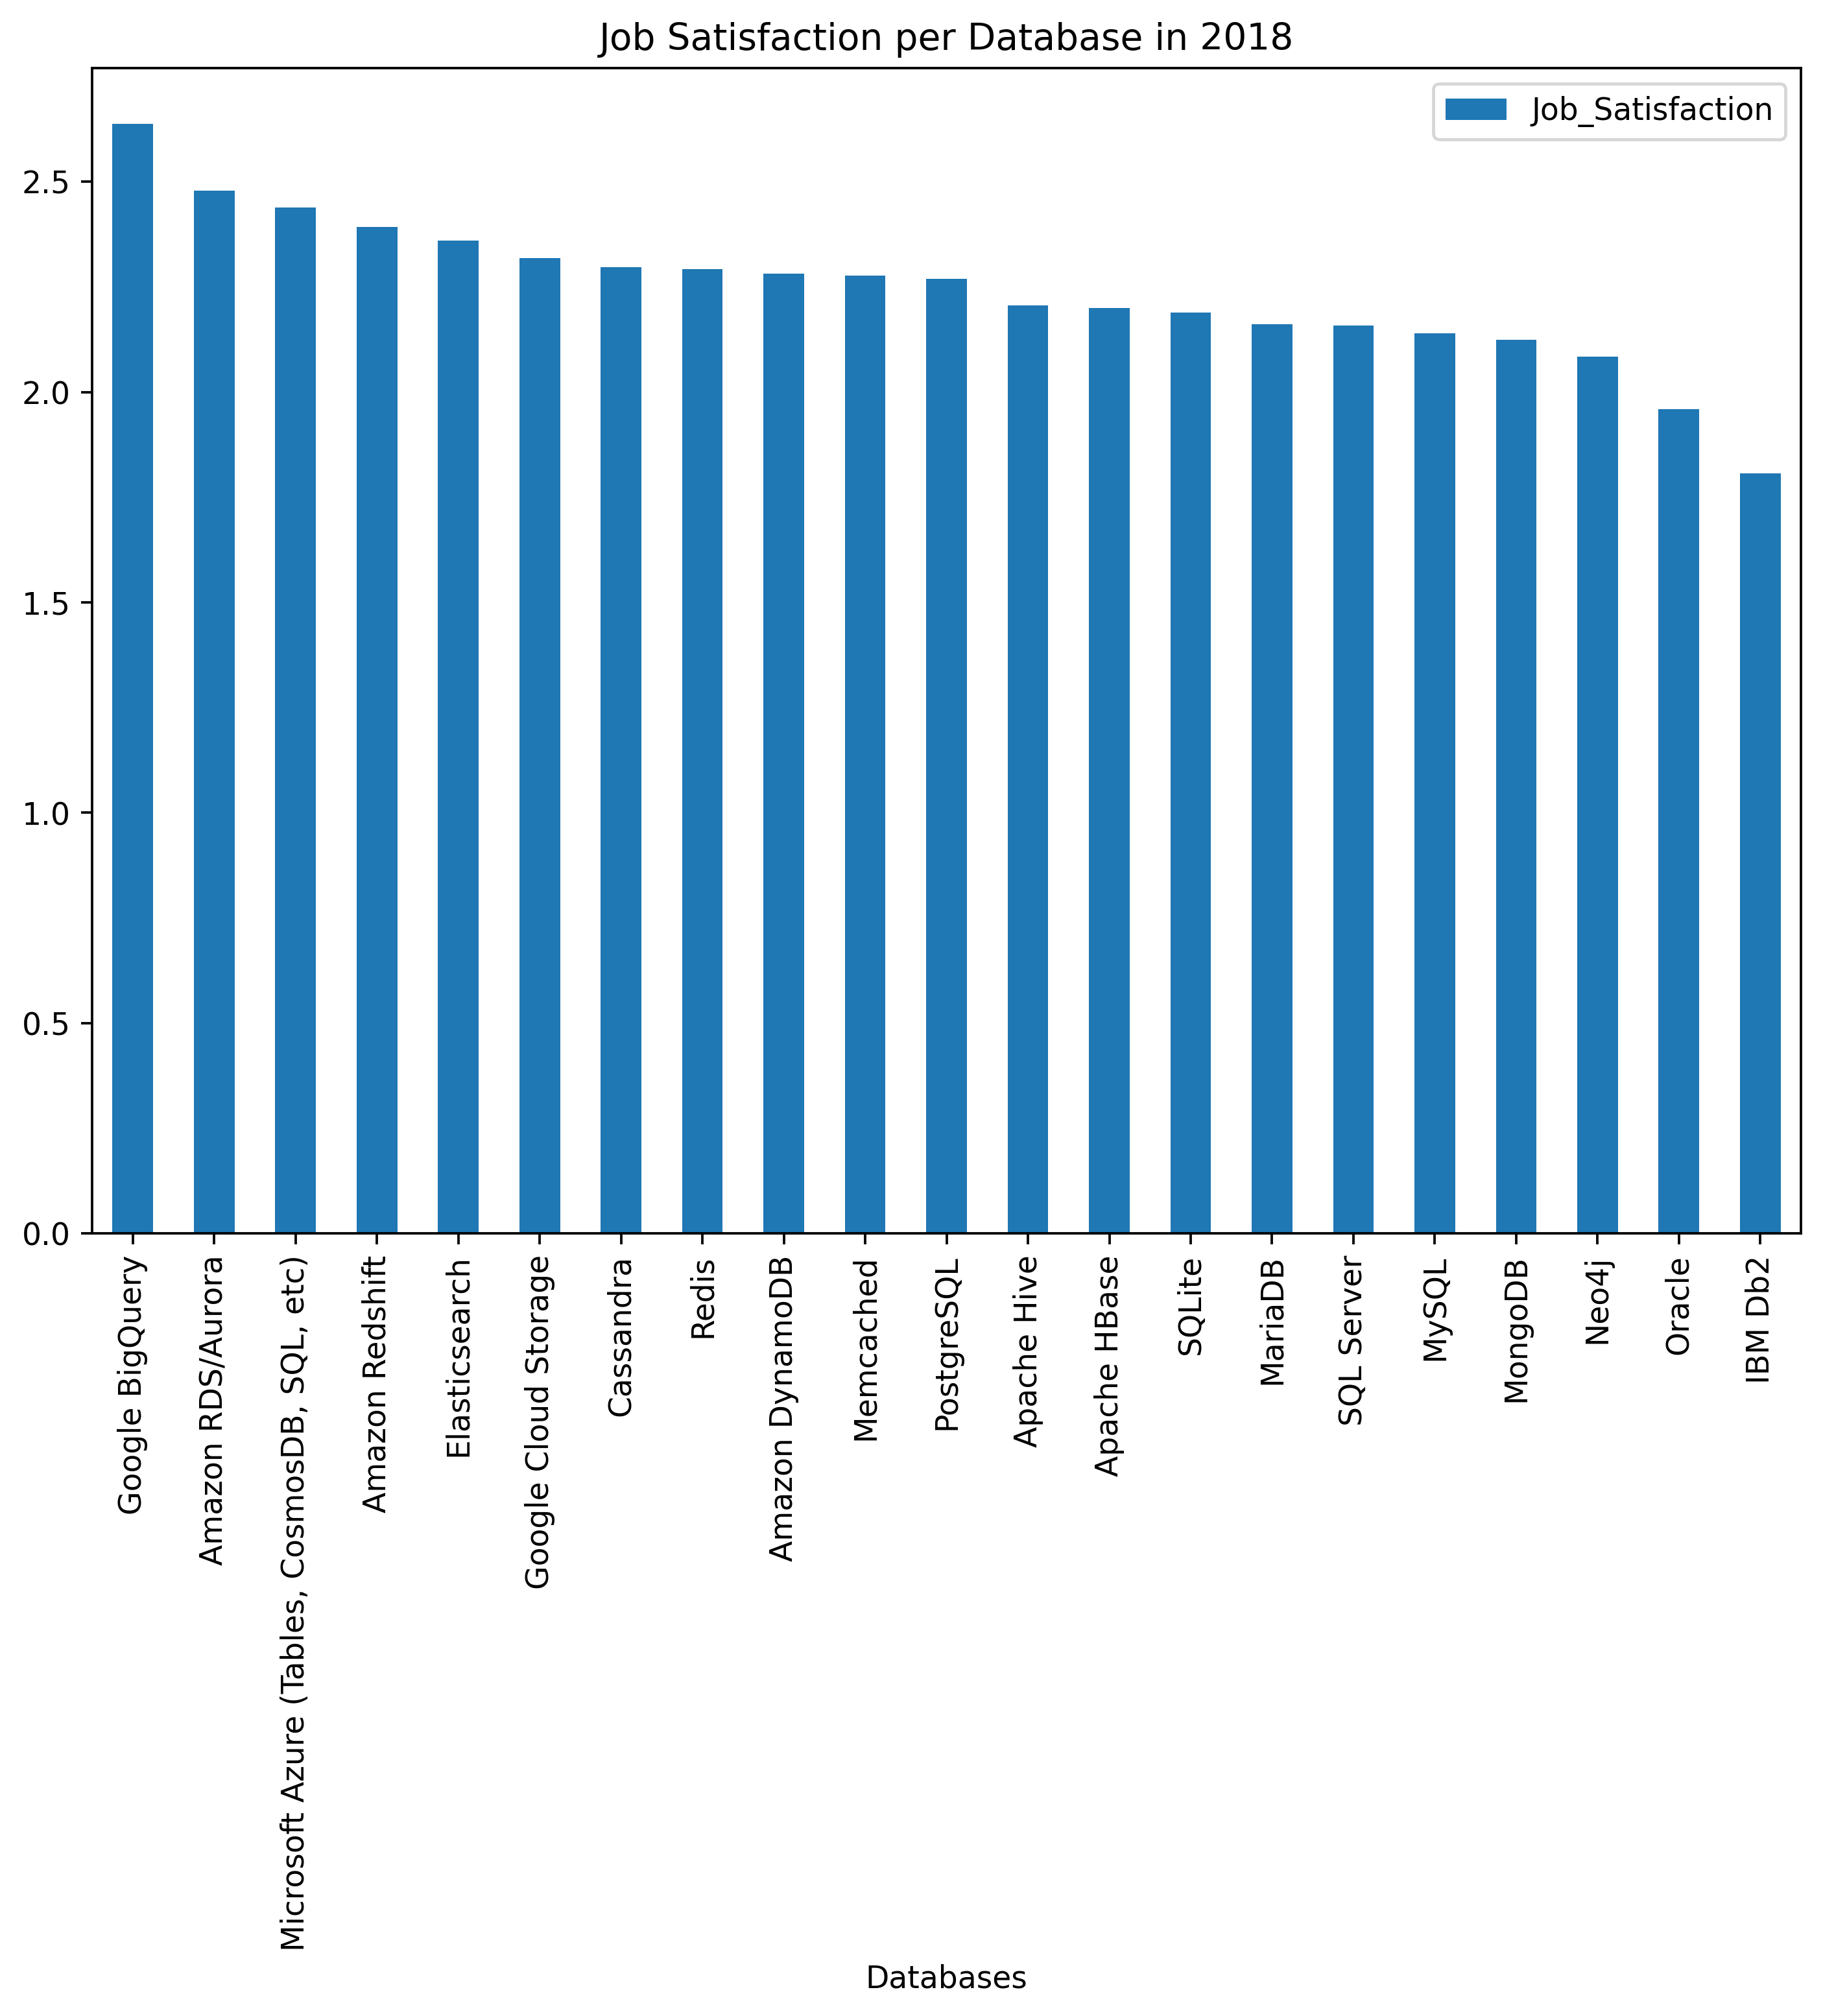

In [21]:
#2018
#Lets drop all rows where no databases are entered
data_2018_s2 = data_2018_s.dropna(subset=['Databases']).reset_index(drop=True)
data = data_2018_s2
col = 'Databases'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2018_databases = df_new.groupby('Databases').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2018_databases.plot.bar(title='Job Satisfaction per Database in 2018', figsize=(10,7))

<AxesSubplot:title={'center':'Job Satisfaction per Database in 2019'}, xlabel='Databases'>

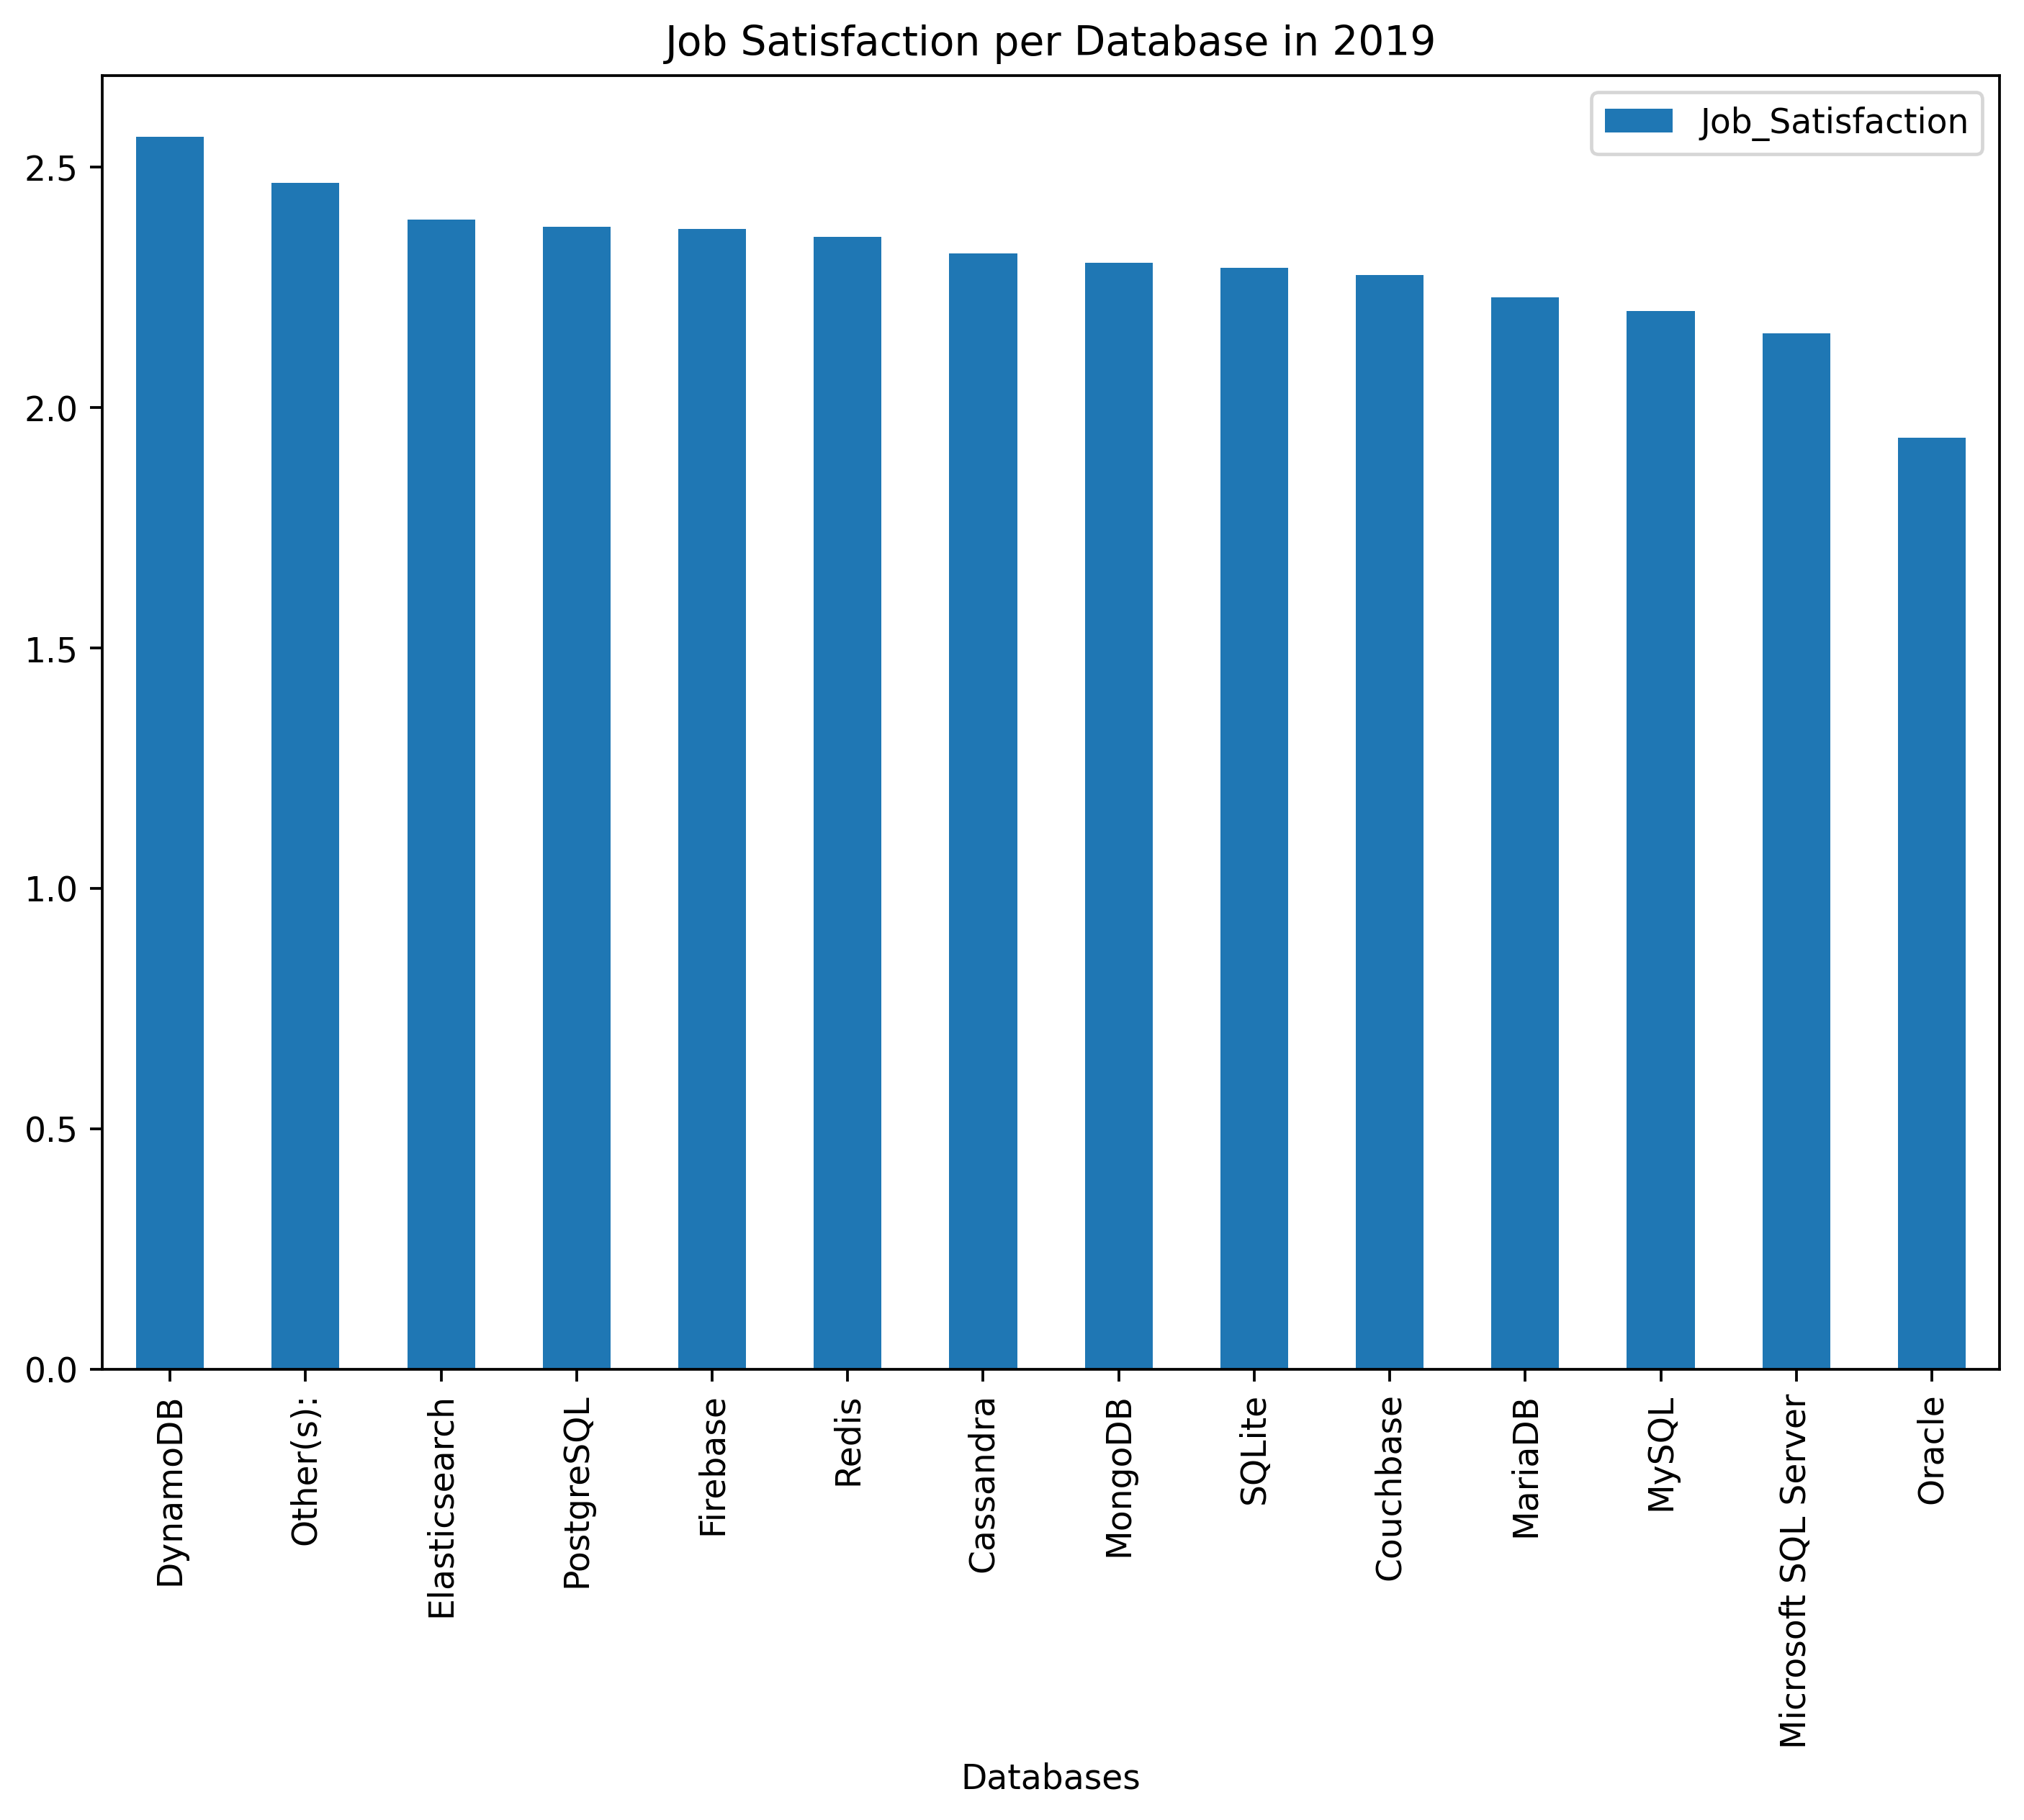

In [22]:
#2019
#Lets drop all rows where no databases are entered
data_2019_s2 = data_2019_s.dropna(subset=['Databases']).reset_index(drop=True)
data = data_2019_s2
col = 'Databases'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2019_databases = df_new.groupby('Databases').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2019_databases.plot.bar(title='Job Satisfaction per Database in 2019', figsize=(10,7))

<AxesSubplot:title={'center':'Job Satisfaction per Database in 2020'}, xlabel='Databases'>

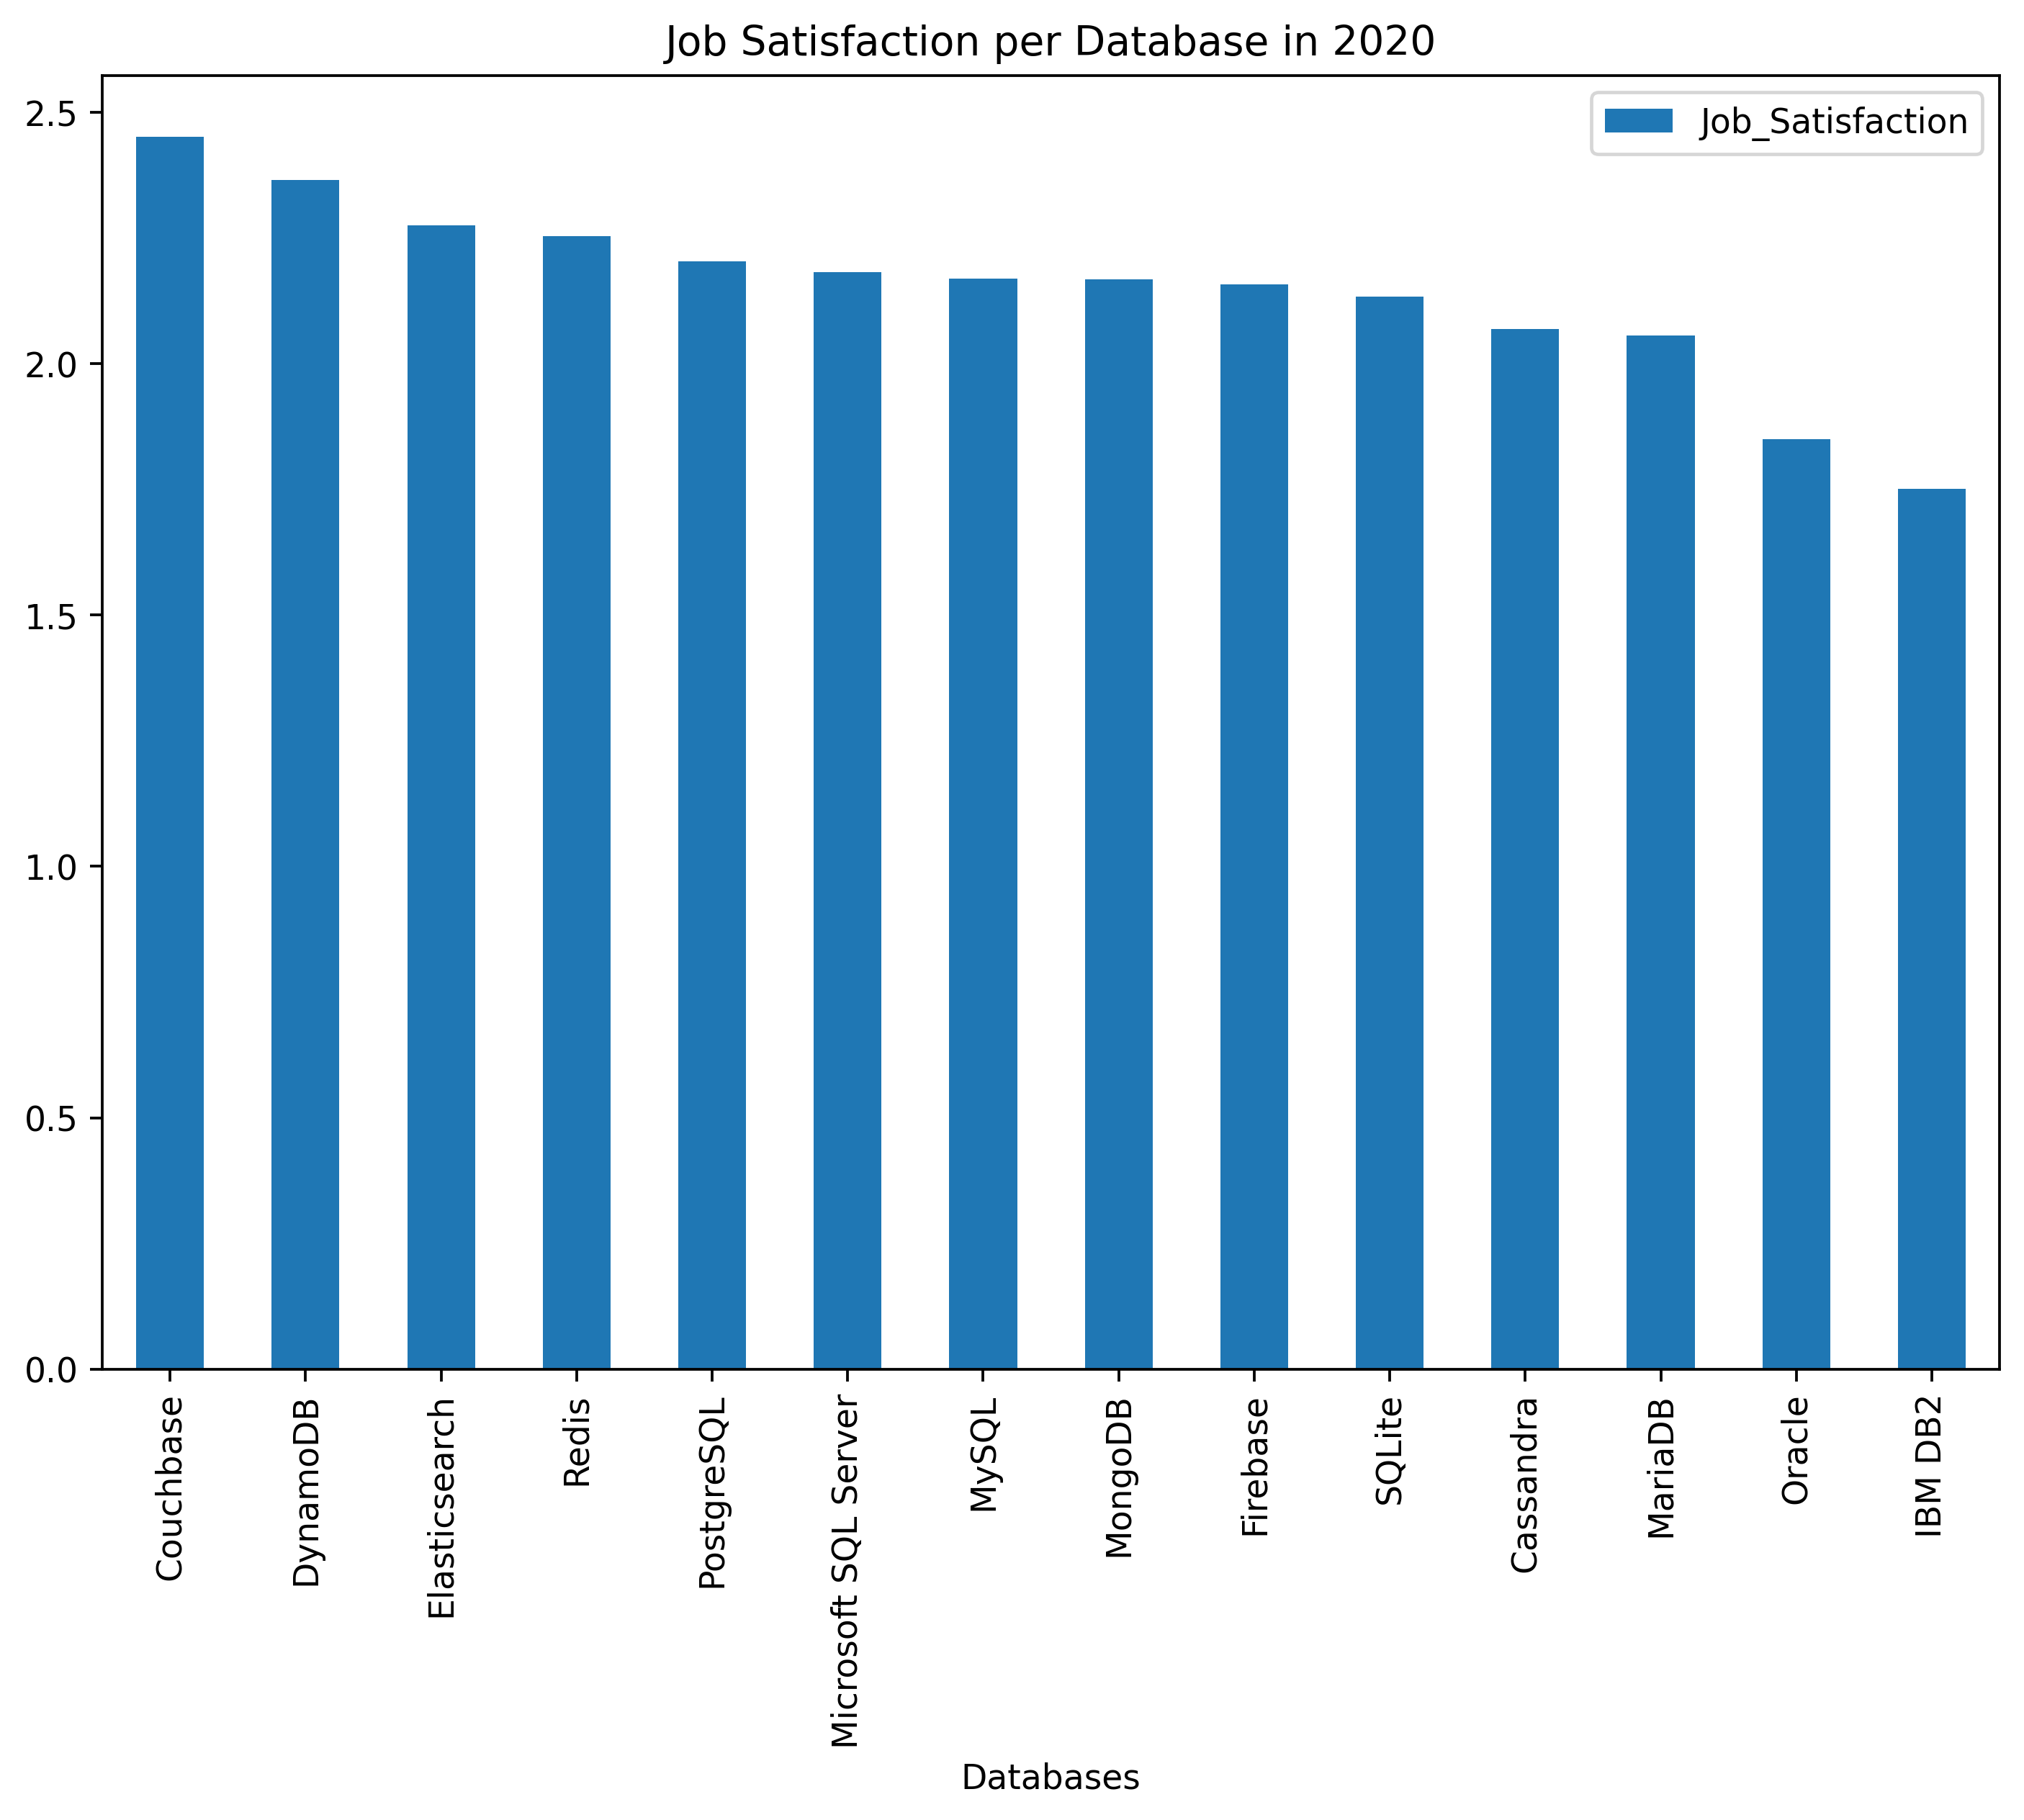

In [23]:
#2020
#Lets drop all rows where no databases are entered
data_2020_s2 = data_2020_s.dropna(subset=['Databases']).reset_index(drop=True)
data = data_2020_s2
col = 'Databases'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2020_databases = df_new.groupby('Databases').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2020_databases.plot.bar(title='Job Satisfaction per Database in 2020', figsize=(10,7))

In [24]:


# lets merge all years.
temp = pd.merge(data_2017_databases, data_2018_databases, on='Databases',how = 'right') 
temp = pd.merge(temp, data_2019_databases, on='Databases',how = 'right')
database_trends = pd.merge(temp, data_2020_databases, on='Databases',how = 'outer')
database_trends.columns = ['2017', '2018', '2019','2020']

# lets keep those rows where there is, at max, 1 years missing
ind = []
for i in range(len(database_trends)):
    if (database_trends.iloc[i,:].isna().sum()) >2 :
        #drop this row
        ind.append(i)
        
database_trends.drop(database_trends.index[ind],inplace=True)
database_trends


,2017,2018,2019,2020
Databases,,,,
DynamoDB,NaN,NaN,2.562625,2.365284
Elasticsearch,NaN,2.360130,2.391192,2.274916
PostgreSQL,2.287168,2.269840,2.375924,2.203002
Firebase,NaN,NaN,2.371225,2.158135
Redis,2.409664,2.293185,2.355226,2.253488
Cassandra,2.445161,2.296736,2.320161,2.069301
MongoDB,2.321734,2.125015,2.301532,2.168263
SQLite,2.182016,2.189847,2.291333,2.132794
Couchbase,NaN,NaN,2.275114,2.450820


<AxesSubplot:title={'center':'Job Satisfaction vs Databases in 2017, 2018 , 2019 and 2020'}, xlabel='Databases'>

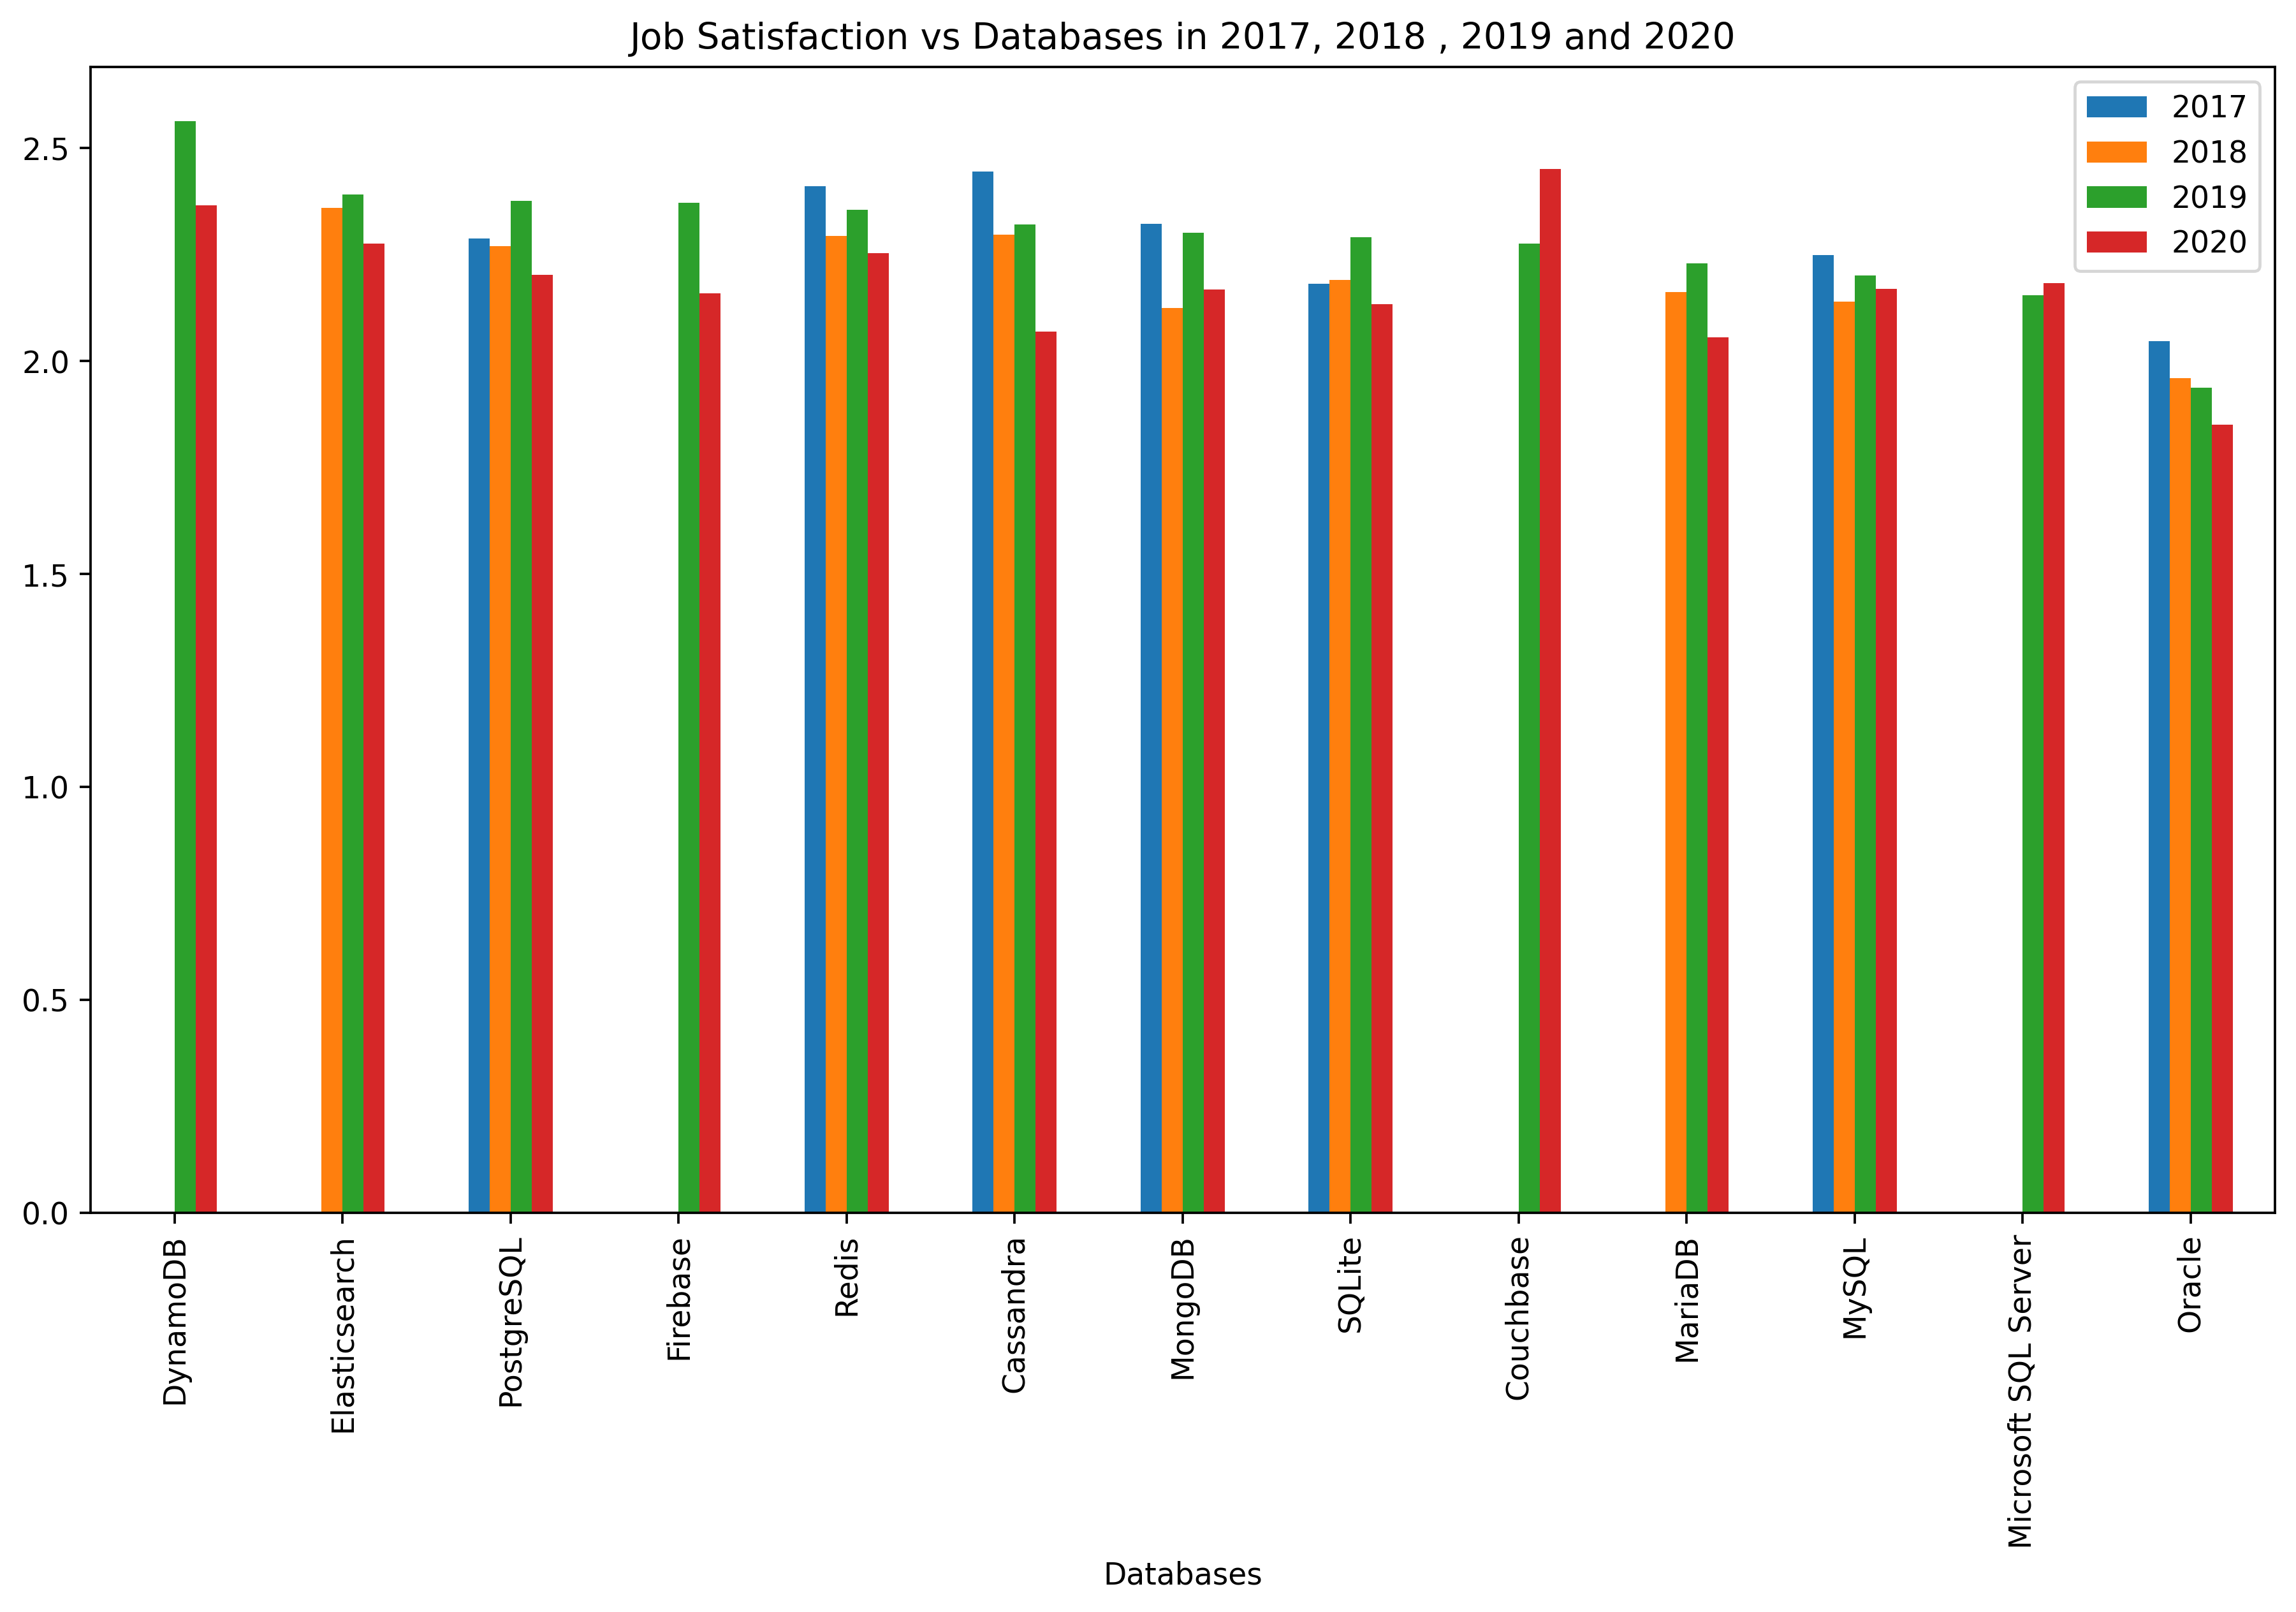

In [25]:

database_trends.plot(title='Job Satisfaction vs Databases in 2017, 2018 , 2019 and 2020',kind='bar', figsize=(13,7))

## Conclusion
### We can see that Oracle is the worst database base in terms of job satisfaction as it  has the loewst satisfaction among all the databases and this seems to be decreasing over the years.  Couchbase has seen very high jump in terms of job satisfaction over the past two years.


## Now Lets do the same for Platforms

<AxesSubplot:title={'center':'Job Satisfaction per Platform in 2017'}, xlabel='Platforms'>

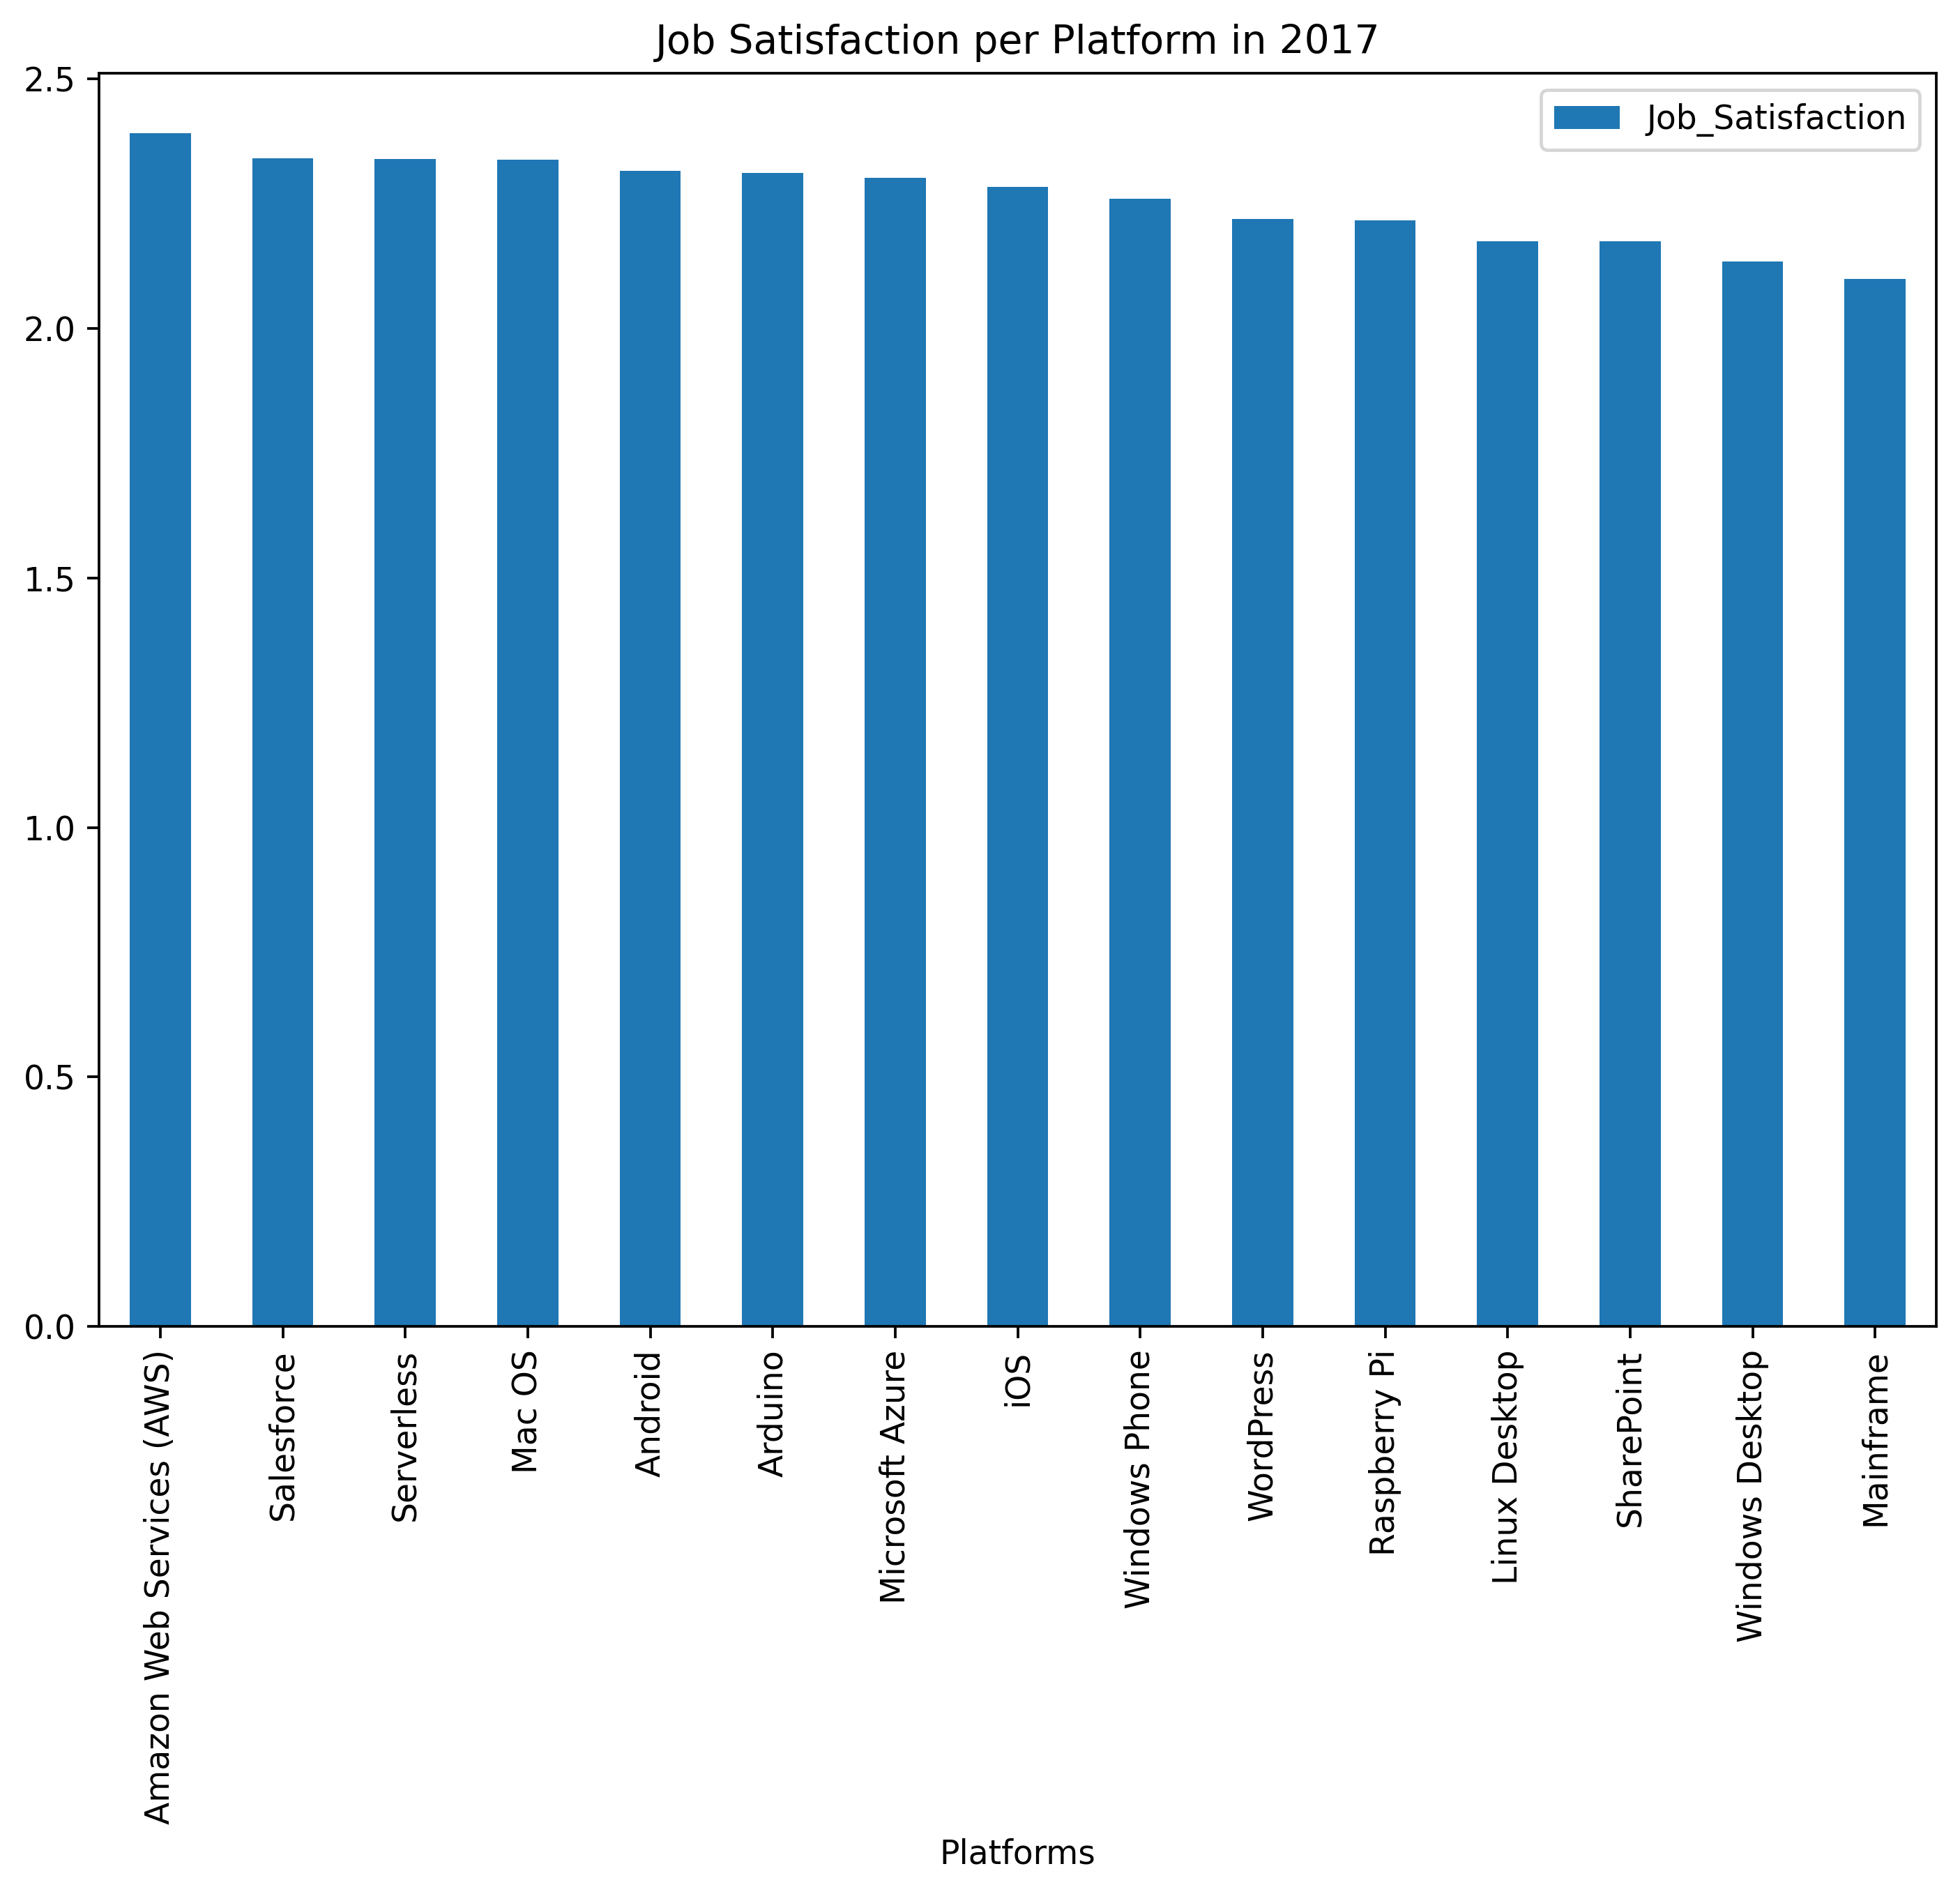

In [26]:
#2017
#Lets drop all rows where no platforms are entered
data_2017_s2 = data_2017_s.dropna(subset=['Platforms']).reset_index(drop=True)
data = data_2017_s2
col = 'Platforms'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2017_platforms = df_new.groupby('Platforms').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2017_platforms.plot.bar(title='Job Satisfaction per Platform in 2017', figsize=(10,7))

<AxesSubplot:title={'center':'Job Satisfaction per Platform in 2018'}, xlabel='Platforms'>

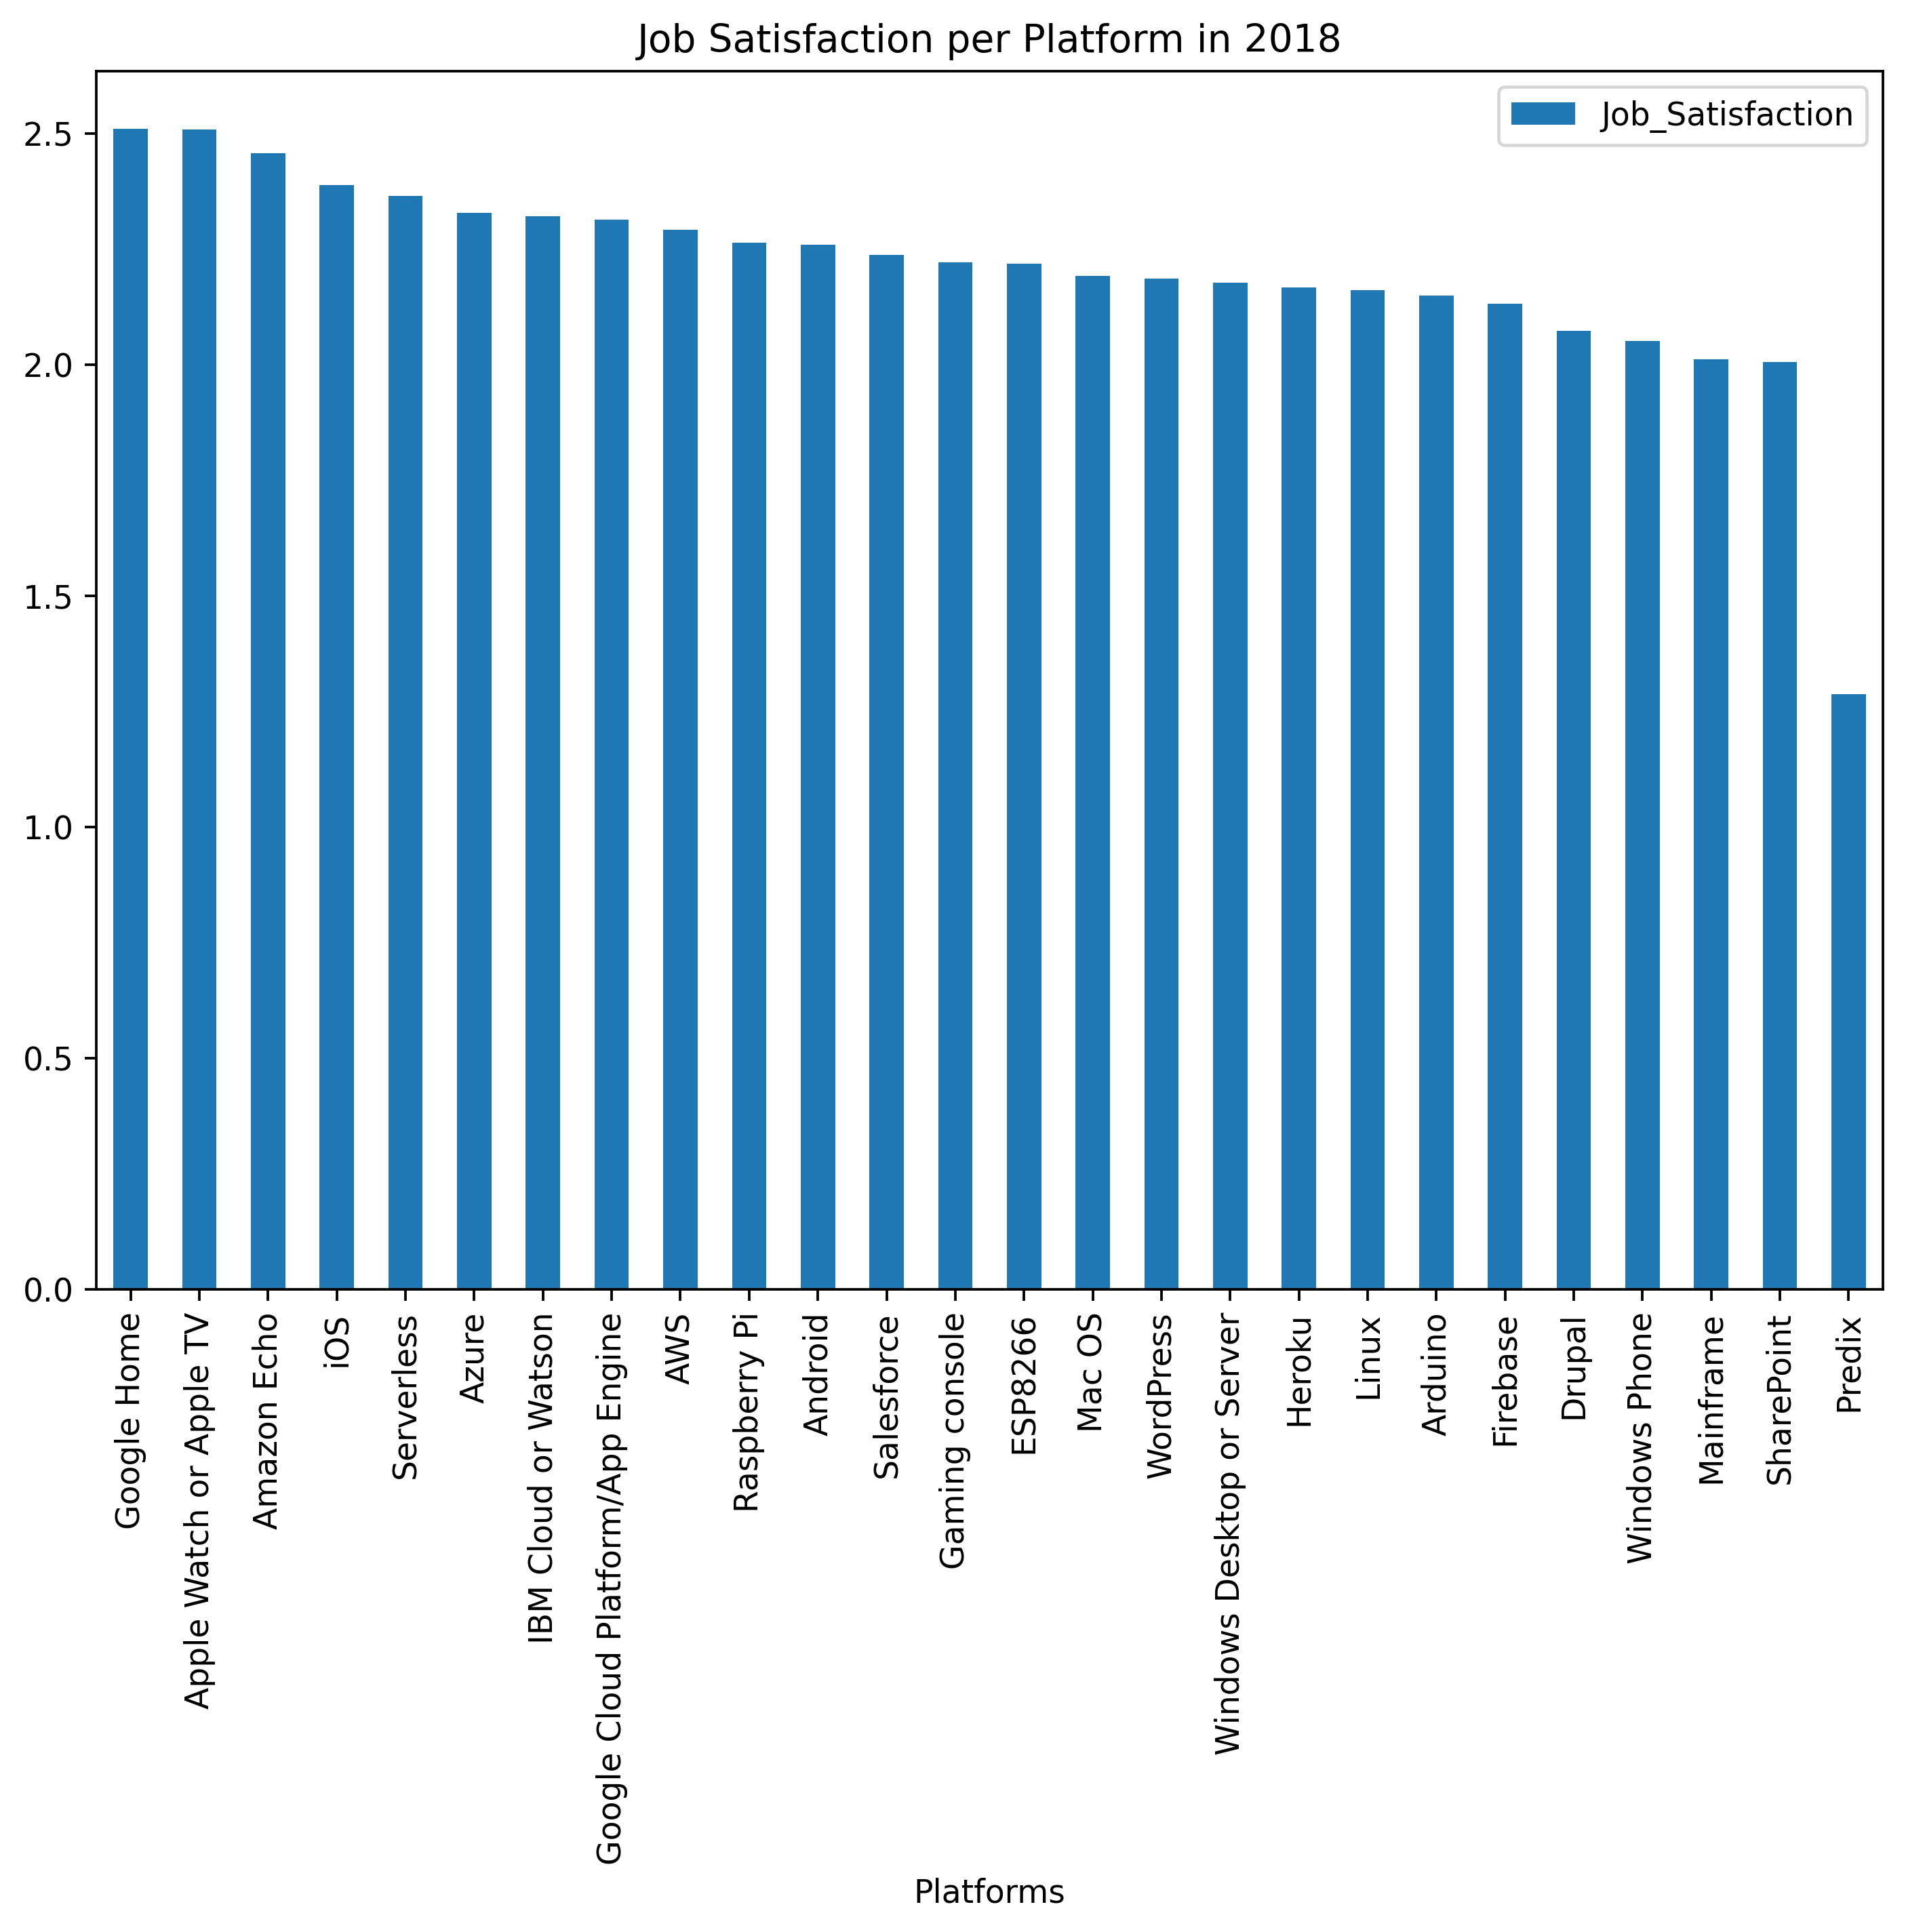

In [27]:
#2018
#Lets drop all rows where no platforms are entered
data_2018_s2 = data_2018_s.dropna(subset=['Platforms']).reset_index(drop=True)
data = data_2018_s2
col = 'Platforms'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2018_platforms = df_new.groupby('Platforms').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2018_platforms.plot.bar(title='Job Satisfaction per Platform in 2018', figsize=(10,7))

<AxesSubplot:title={'center':'Job Satisfaction per Platform in 2019'}, xlabel='Platforms'>

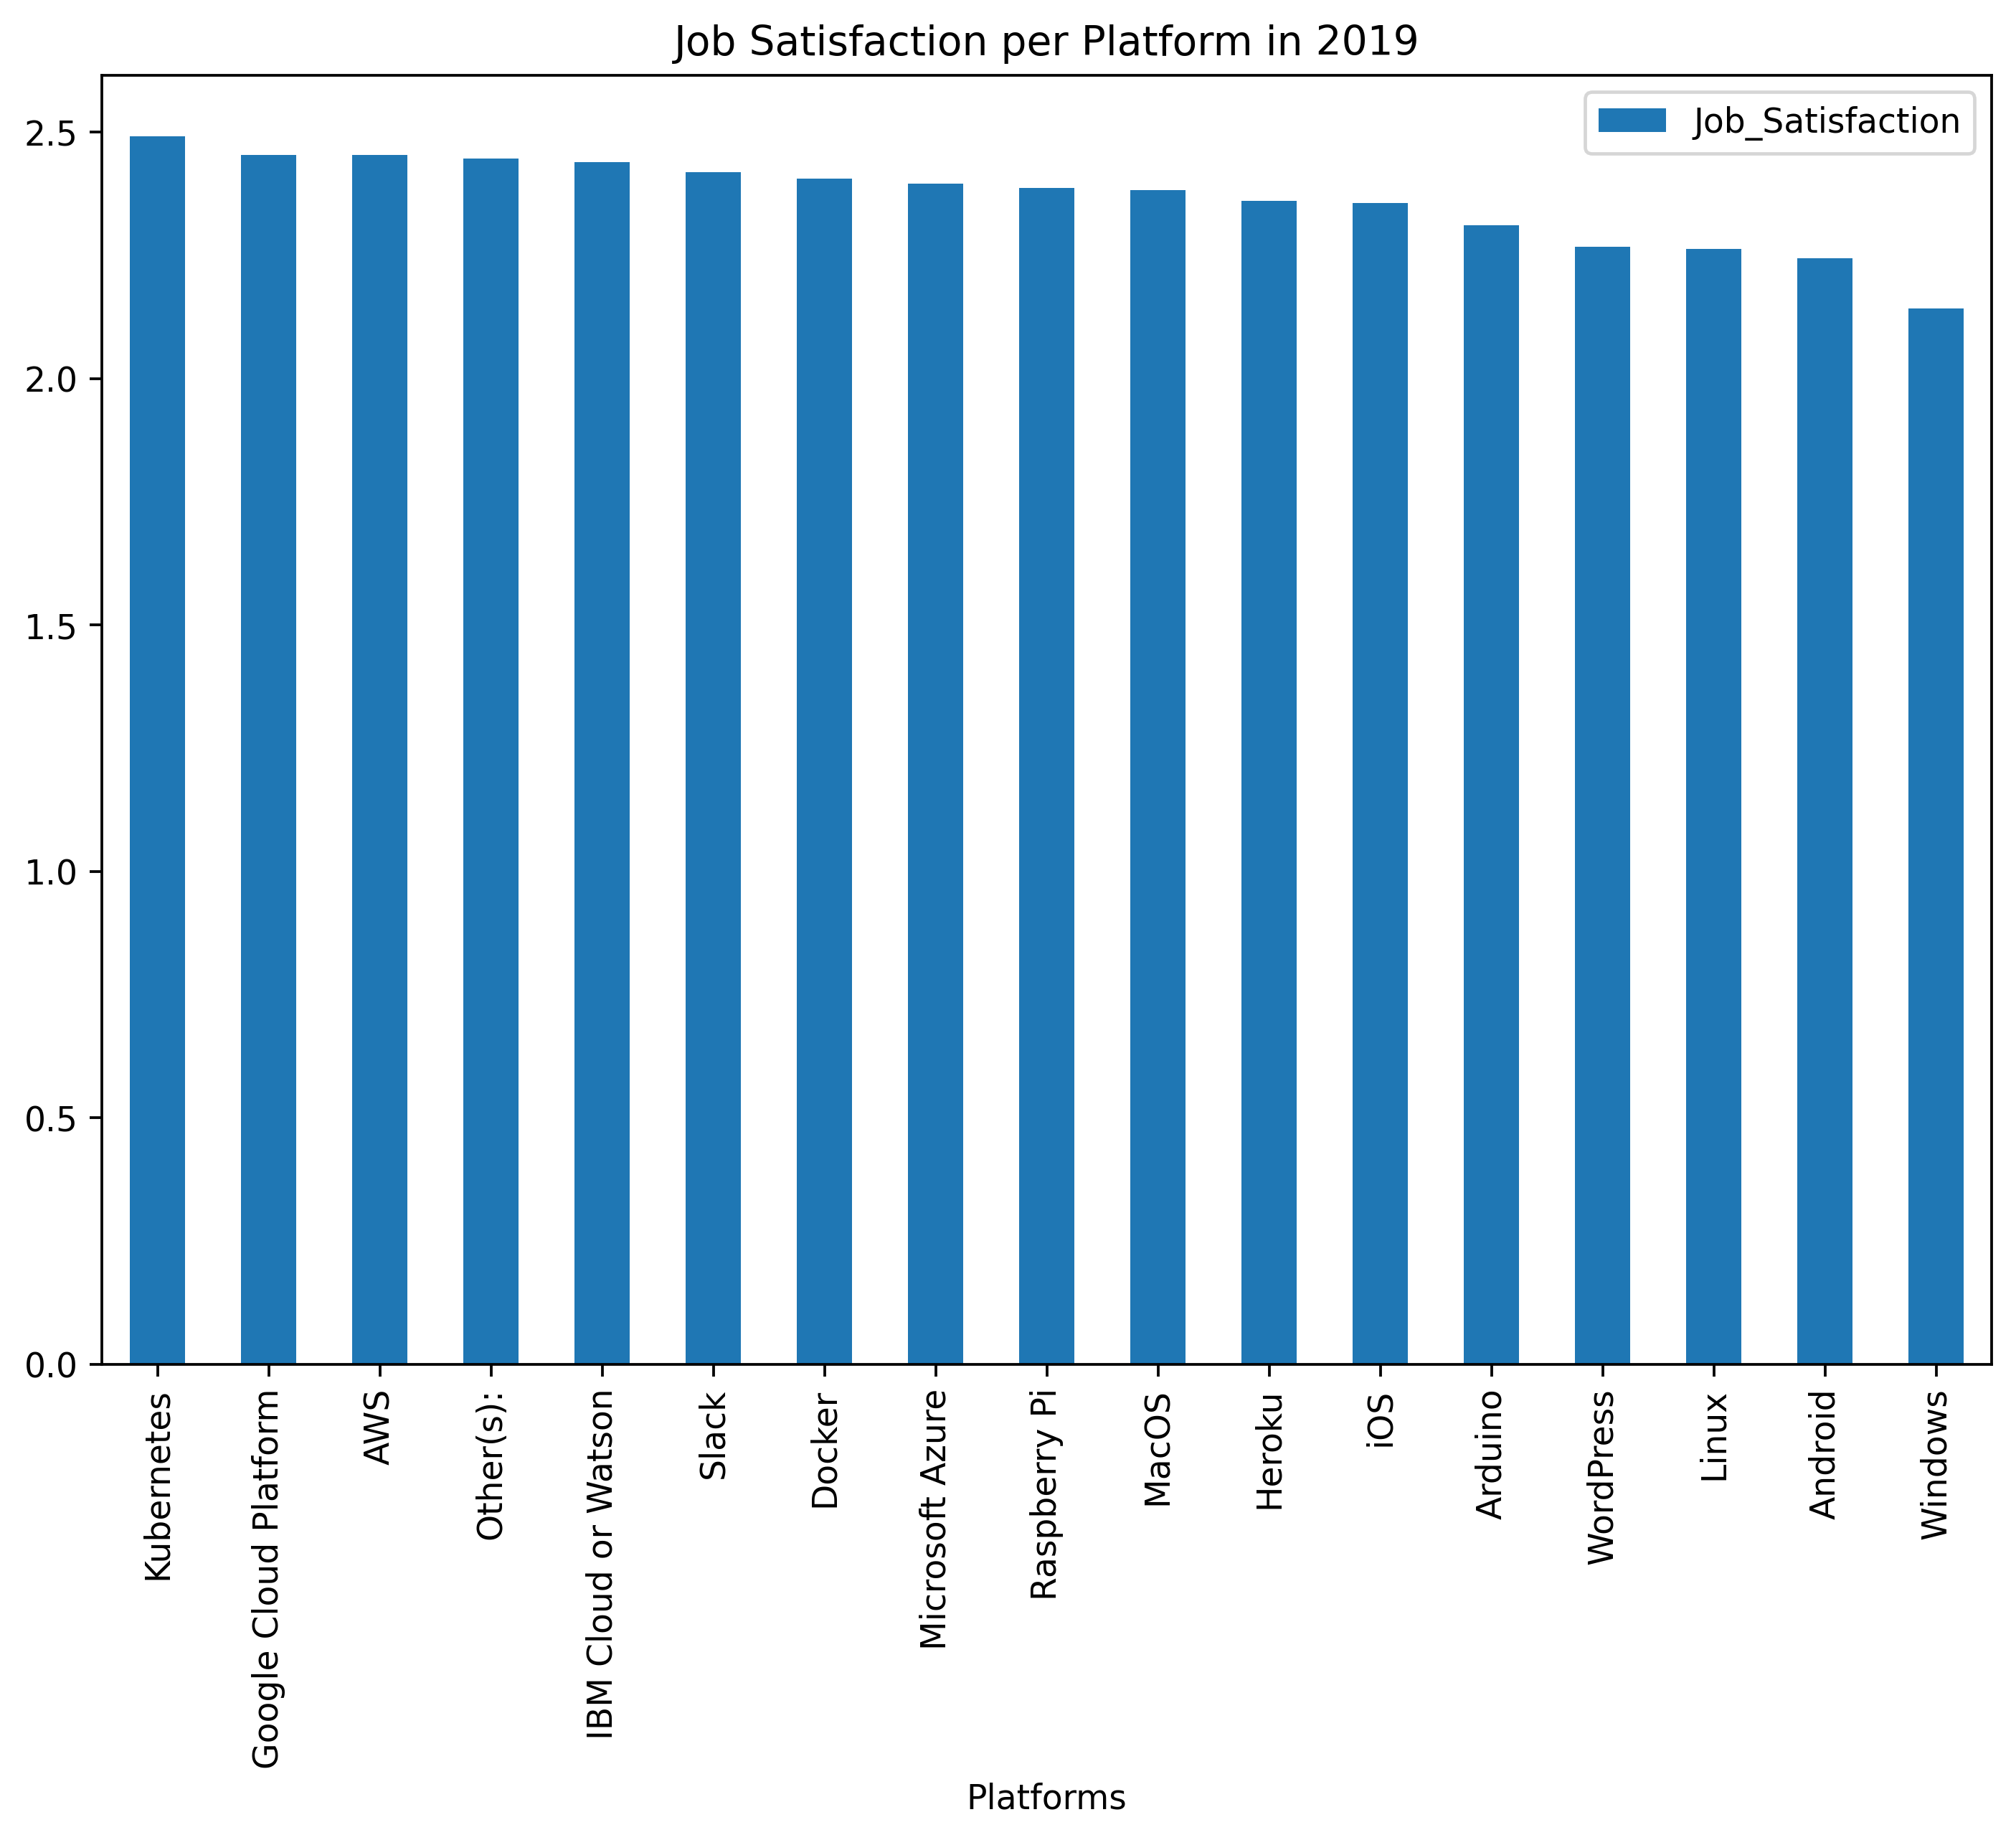

In [28]:
#2019
#Lets drop all rows where no platforms are entered
data_2019_s2 = data_2019_s.dropna(subset=['Platforms']).reset_index(drop=True)
data = data_2019_s2
col = 'Platforms'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2019_platforms = df_new.groupby('Platforms').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2019_platforms.plot.bar(title='Job Satisfaction per Platform in 2019', figsize=(10,7))

<AxesSubplot:title={'center':'Job Satisfaction per Platform in 2020'}, xlabel='Platforms'>

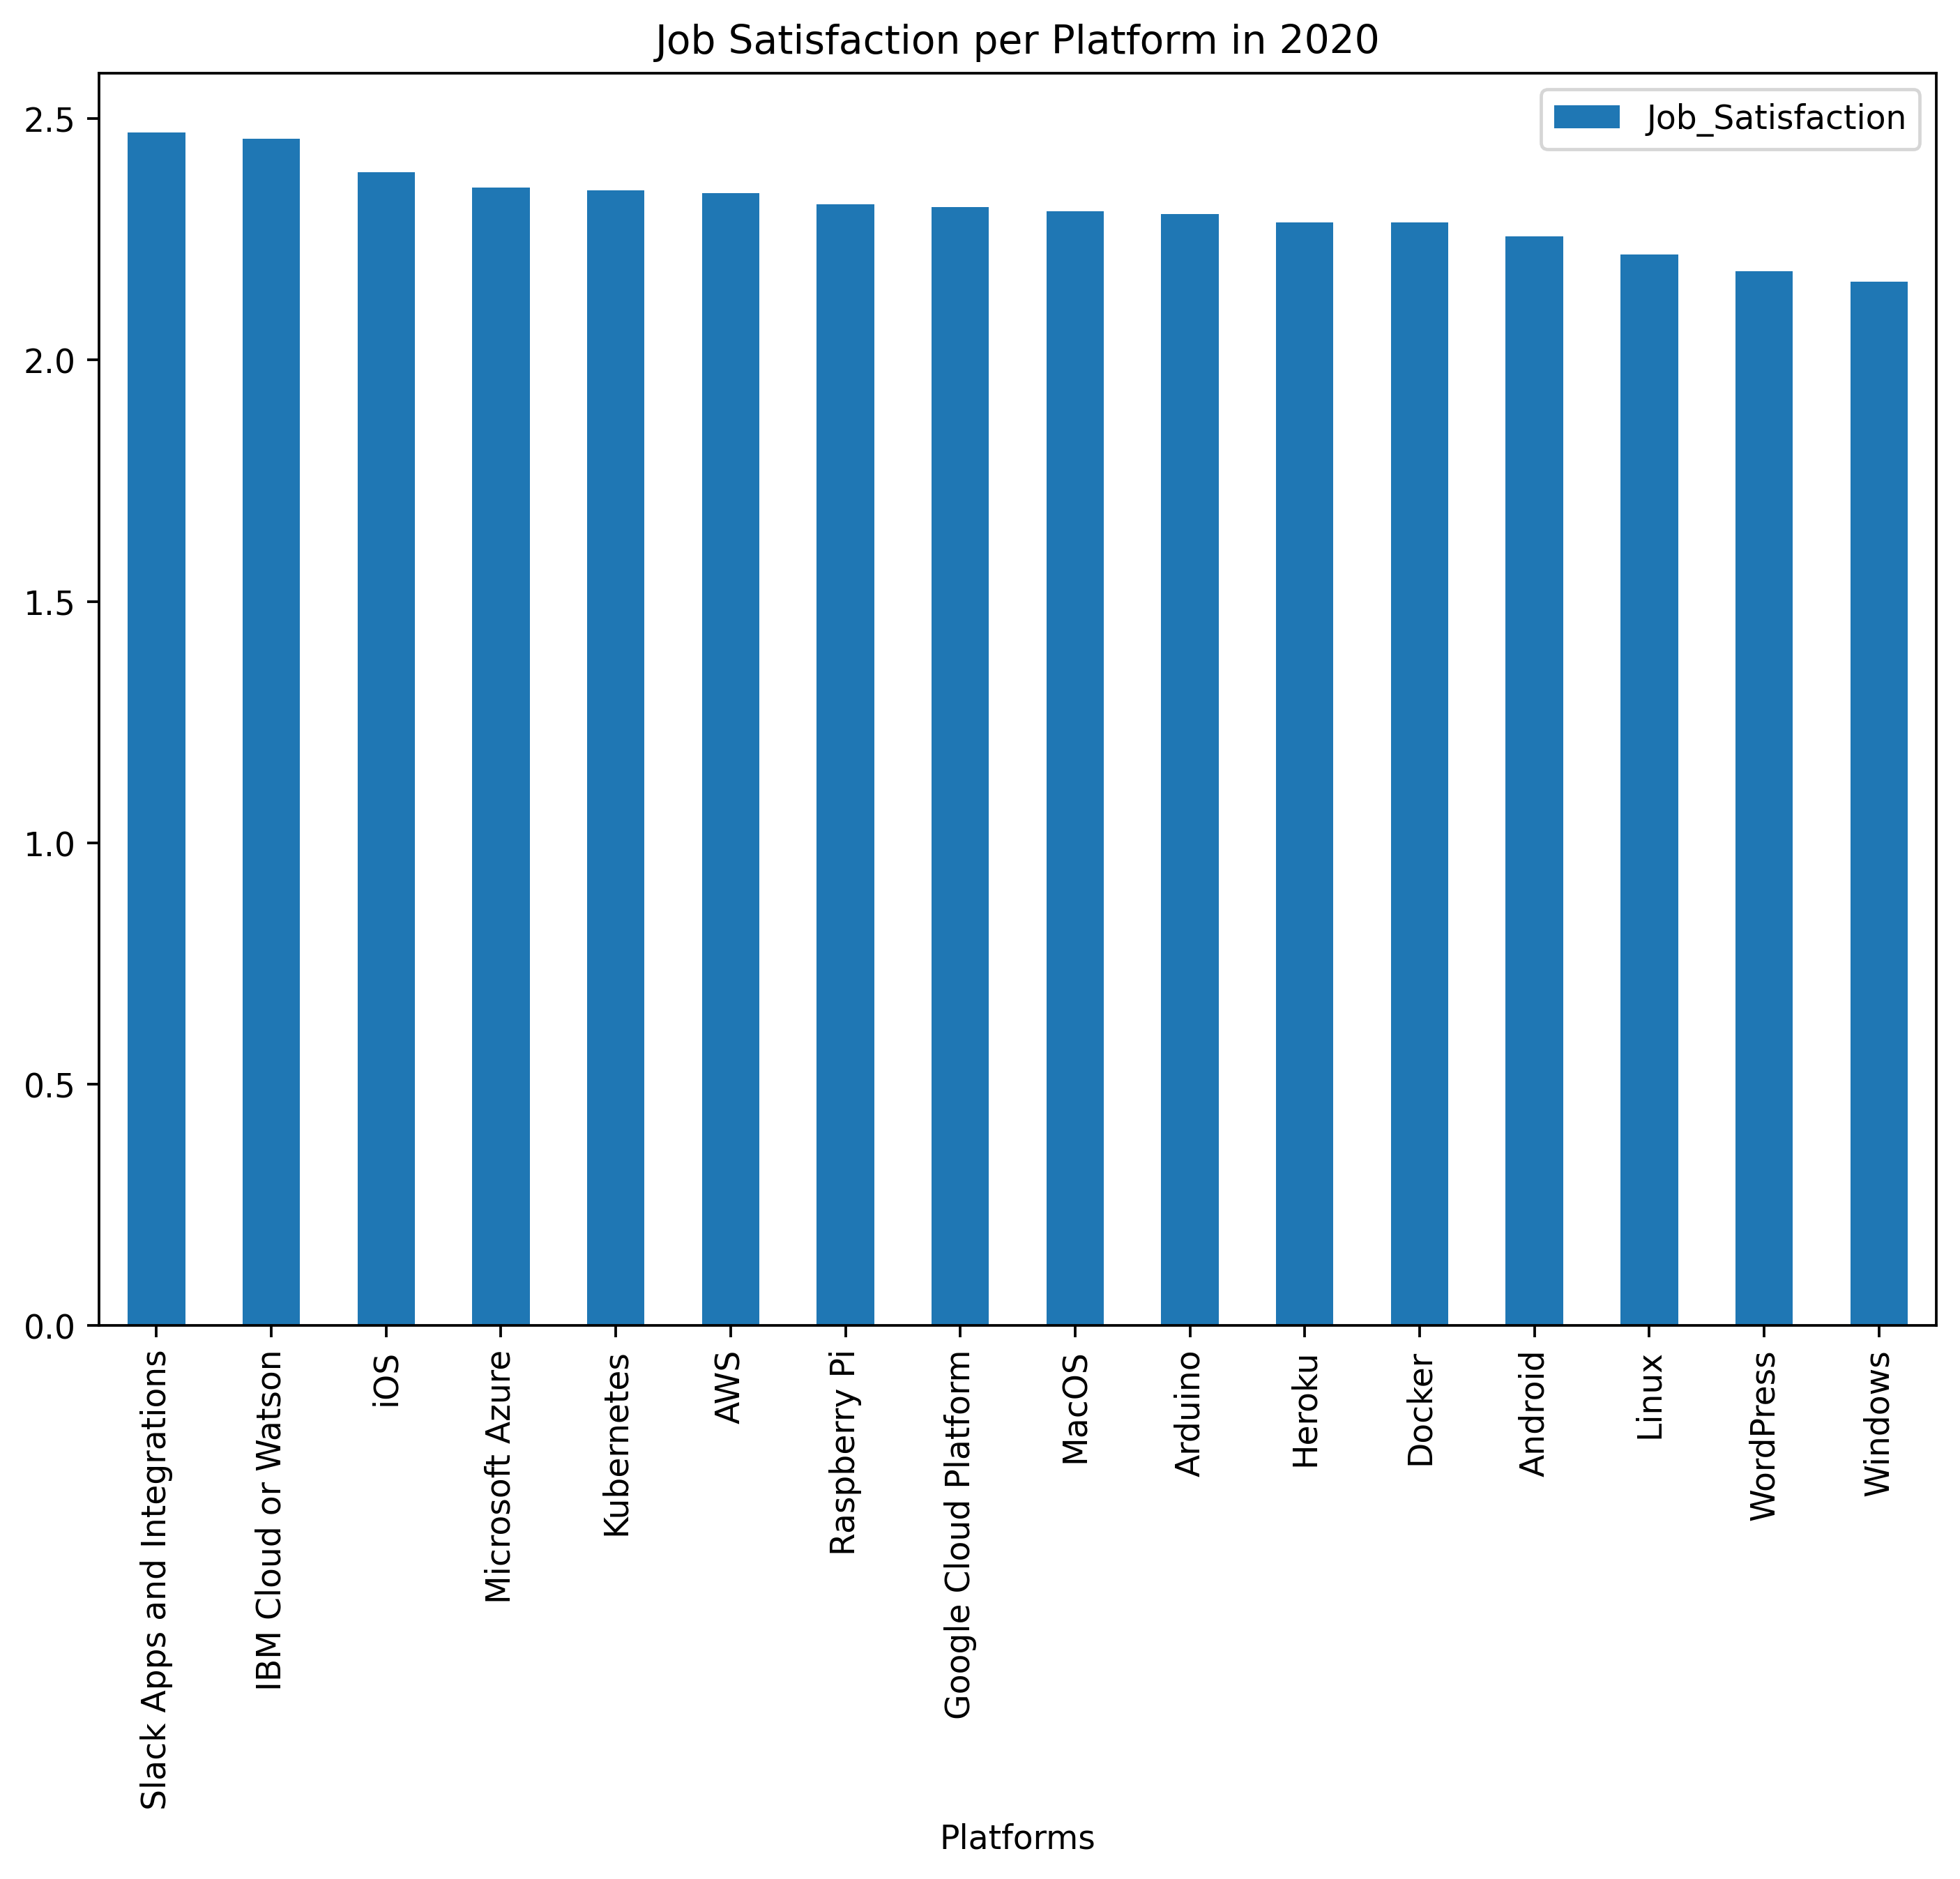

In [29]:
#2020
#Lets drop all rows where no platforms are entered
data_2020_s2 = data_2020_s.dropna(subset=['Platforms']).reset_index(drop=True)
data = data_2020_s2
col = 'Platforms'
Job_Satisfaction_lst = []
val = []

for i in range(len(data)):
    vals = data.loc[i,col].split(';')
    Job_Satisfaction = data.loc[i,'Job_Satisfaction']
    
    for j in vals:
        val.append(j.strip())
        Job_Satisfaction_lst.append(Job_Satisfaction)
df_new = pd.DataFrame(val)
df_new.columns = [col]
df_new.loc[:,'Job_Satisfaction'] = Job_Satisfaction_lst     


data_2020_platforms = df_new.groupby('Platforms').mean().sort_values(by='Job_Satisfaction',ascending = False)
data_2020_platforms.plot.bar(title='Job Satisfaction per Platform in 2020', figsize=(10,7))

In [30]:


# lets merge all years.
temp = pd.merge(data_2017_platforms, data_2018_platforms, on='Platforms',how = 'right') 
temp = pd.merge(temp, data_2019_platforms, on='Platforms',how = 'right')
platform_trends = pd.merge(temp, data_2020_platforms, on='Platforms',how = 'outer')
platform_trends.columns = ['2017', '2018', '2019','2020']

# lets keep those rows where there is, at max, 1 years missing
ind = []
for i in range(len(platform_trends)):
    if (platform_trends.iloc[i,:].isna().sum()) >1 :
        #drop this row
        ind.append(i)
        
platform_trends.drop(platform_trends.index[ind],inplace=True)
platform_trends



,2017,2018,2019,2020
Platforms,,,,
AWS,NaN,2.291535,2.452728,2.346117
IBM Cloud or Watson,NaN,2.321348,2.438326,2.457958
Raspberry Pi,2.217047,2.263328,2.386182,2.323048
Heroku,NaN,2.166378,2.360627,2.285260
iOS,2.283693,2.388529,2.355759,2.389062
Arduino,2.311847,2.149472,2.310293,2.302186
WordPress,2.220039,2.186072,2.267327,2.183938
Linux,NaN,2.160958,2.262585,2.218651
Android,2.316168,2.258703,2.243357,2.255906


<AxesSubplot:title={'center':'Job Satisfaction vs Platforms in 2017, 2018 , 2019 and 2020'}, xlabel='Platforms'>

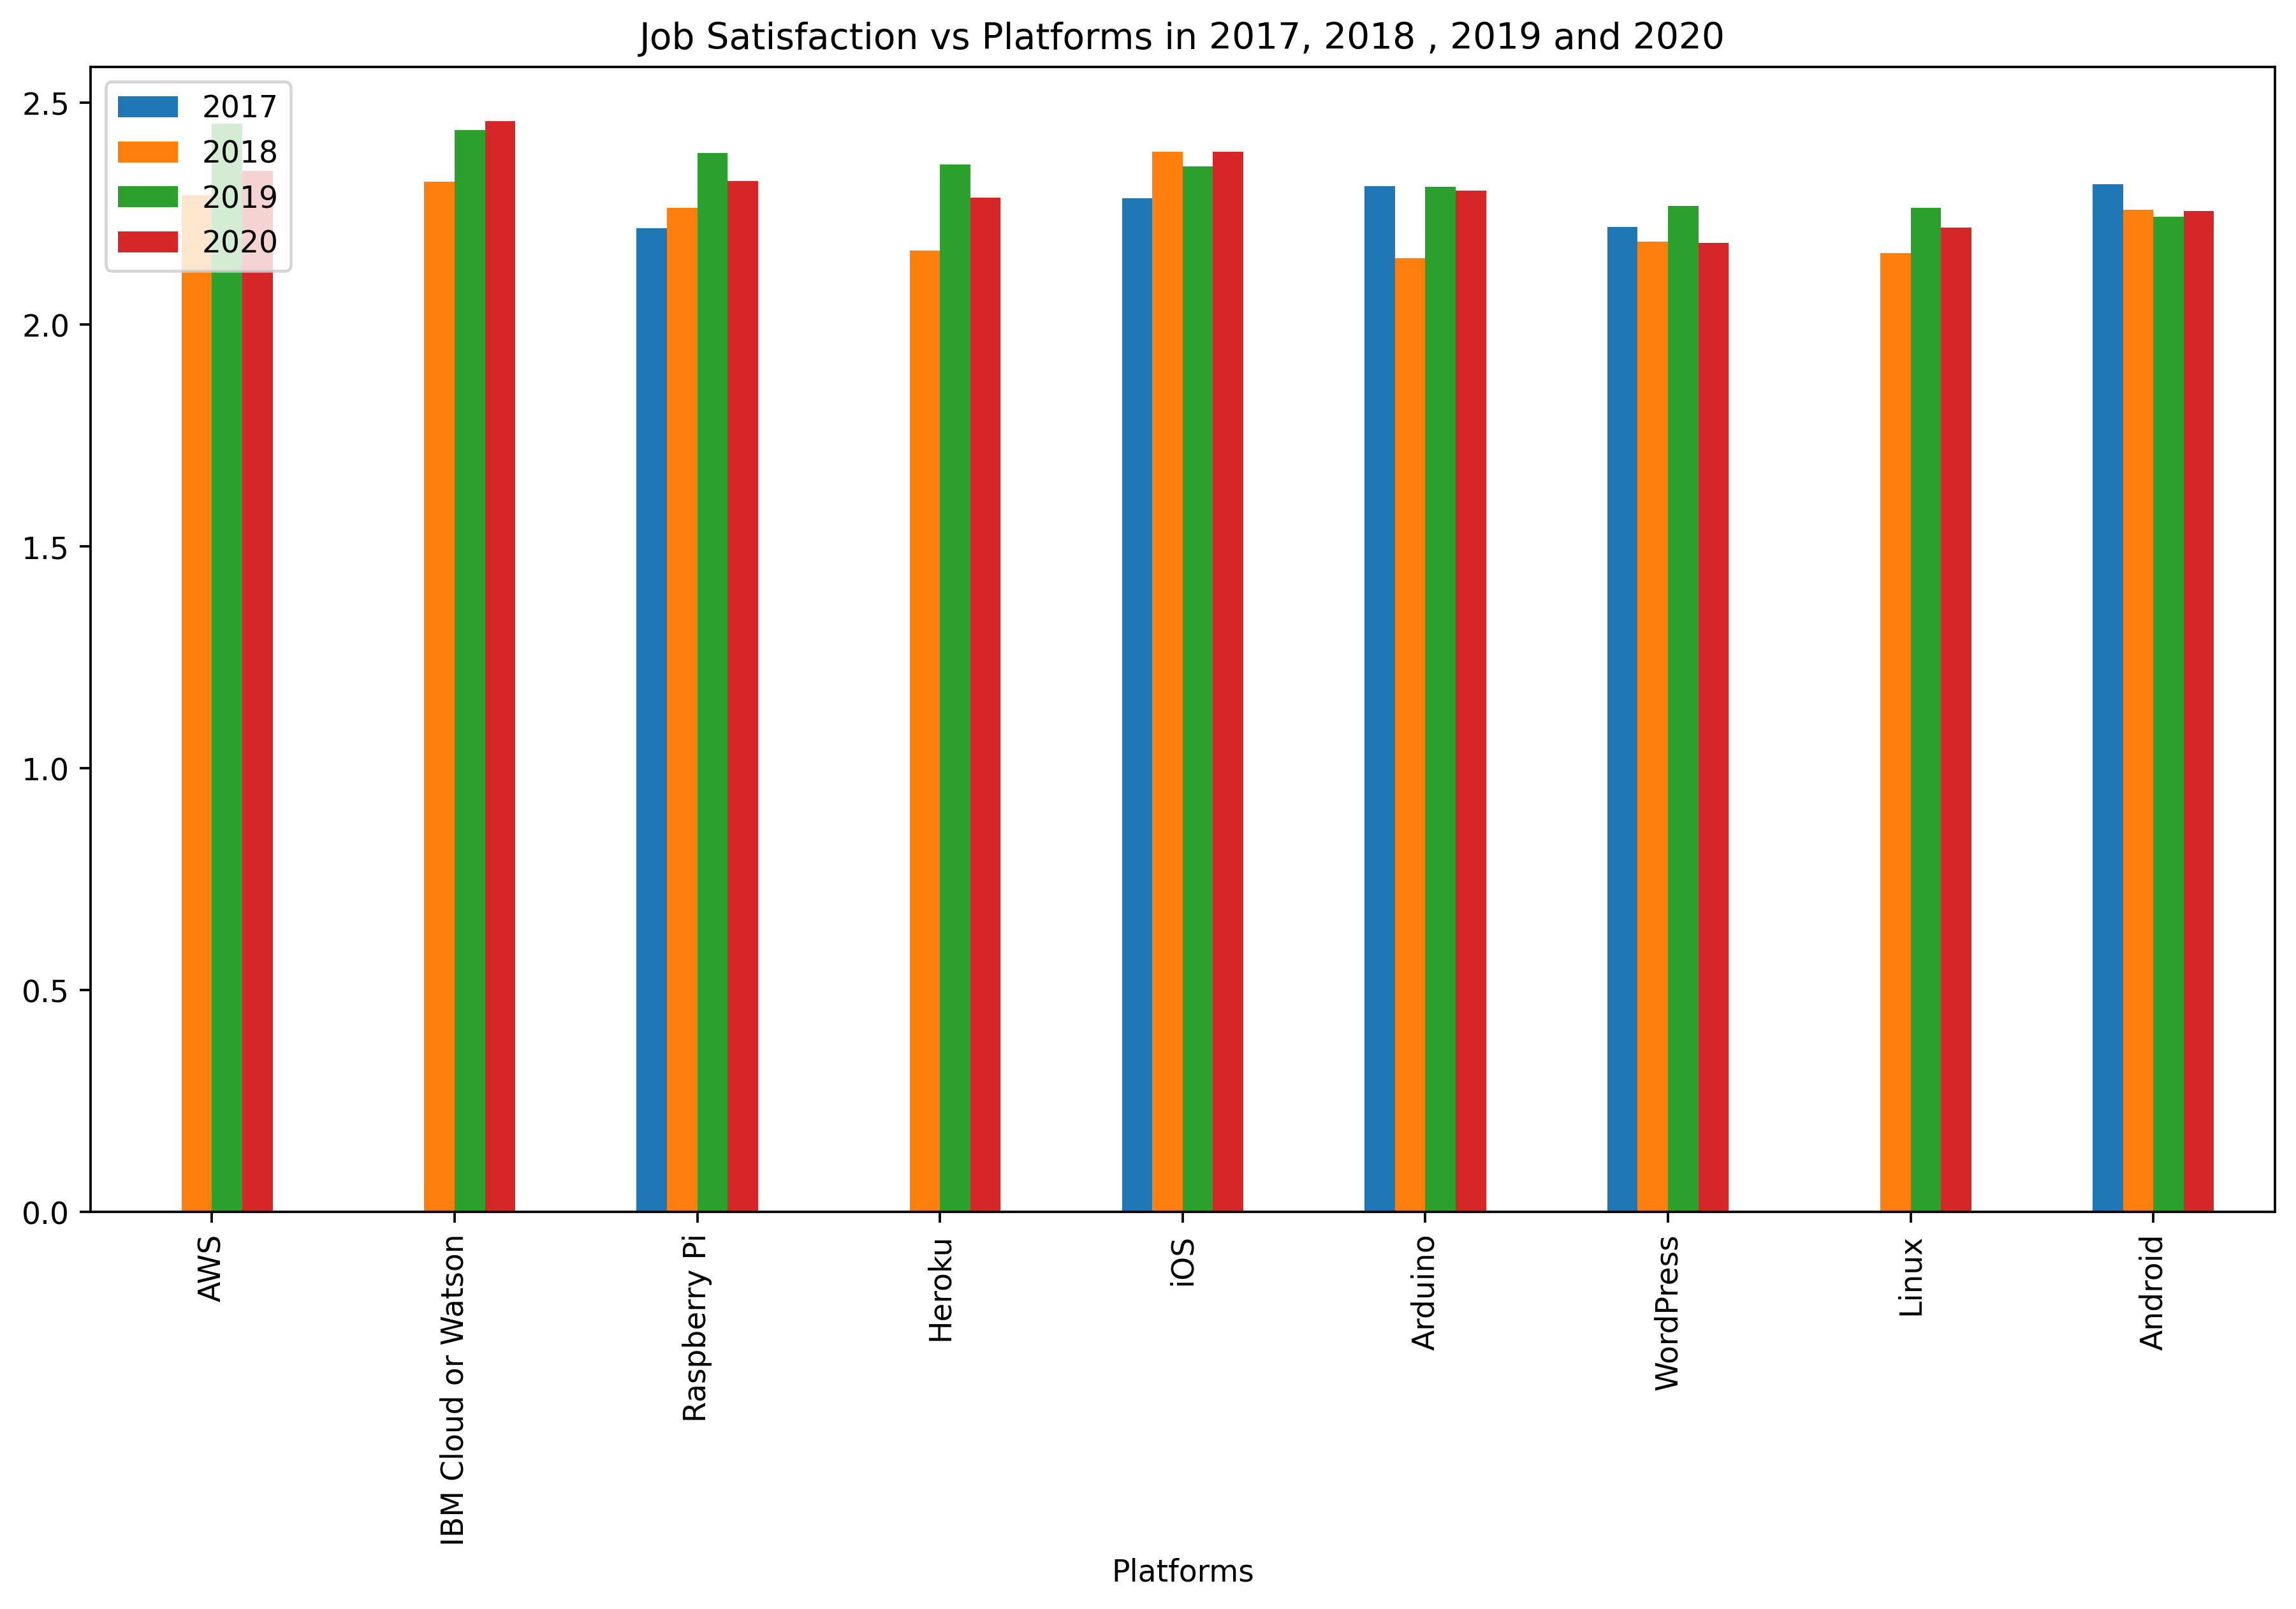

In [31]:

platform_trends.plot(title='Job Satisfaction vs Platforms in 2017, 2018 , 2019 and 2020',kind='bar', figsize=(13,7))

## Conclusion
### Job Satisfaction of IBM Cloud/Watson developers is increasing over the years consistently. Same is the case of iOs and Raspberry Pi. The rest seem to be consistent with their Job Satisfaction level 